In [91]:
%matplotlib inline

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
path = '../input/lish-moa/'
# path = './'

# load dataset 

In [94]:
train_features = pd.read_csv(path + 'train_features.csv')
train_features.head(5)

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [95]:
train_drug = pd.read_csv(path + 'train_drug.csv')
train_drug.head(5)

,sig_id,drug_id
0,id_000644bb2,b68db1d53
1,id_000779bfc,df89a8e5a
2,id_000a6266a,18bb41b2c
3,id_0015fd391,8c7f86626
4,id_001626bd3,7cbed3131


In [96]:
train_targets_nonscored = pd.read_csv(path + 'train_targets_nonscored.csv')
train_targets_nonscored.head(5)

,sig_id,abc_transporter_expression_enhancer,abl_inhibitor,ace_inhibitor,acetylcholine_release_enhancer,adenosine_deaminase_inhibitor,adenosine_kinase_inhibitor,adenylyl_cyclase_inhibitor,age_inhibitor,alcohol_dehydrogenase_inhibitor,...,ve-cadherin_antagonist,vesicular_monoamine_transporter_inhibitor,vitamin_k_antagonist,voltage-gated_calcium_channel_ligand,voltage-gated_potassium_channel_activator,voltage-gated_sodium_channel_blocker,wdr5_mll_interaction_inhibitor,wnt_agonist,xanthine_oxidase_inhibitor,xiap_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
train_targets_scored = pd.read_csv(path + 'train_targets_scored.csv')
train_targets_scored.head(5)

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
sample_submission = pd.read_csv(path + 'sample_submission.csv')
sample_submission.head(5)

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_0004d9e33,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,id_001897cda,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,id_002429b5b,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,id_00276f245,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,id_0027f1083,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [99]:
test_features = pd.read_csv(path + 'test_features.csv')
test_features.head(5)

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_0004d9e33,trt_cp,24,D1,-0.5458,0.1306,-0.5135,0.4408,1.5500,-0.1644,...,0.0981,0.7978,-0.1430,-0.2067,-0.2303,-0.1193,0.0210,-0.0502,0.1510,-0.7750
1,id_001897cda,trt_cp,72,D1,-0.1829,0.2320,1.2080,-0.4522,-0.3652,-0.3319,...,-0.1190,-0.1852,-1.0310,-1.3670,-0.3690,-0.5382,0.0359,-0.4764,-1.3810,-0.7300
2,id_002429b5b,ctl_vehicle,24,D1,0.1852,-0.1404,-0.3911,0.1310,-1.4380,0.2455,...,-0.2261,0.3370,-1.3840,0.8604,-1.9530,-1.0140,0.8662,1.0160,0.4924,-0.1942
3,id_00276f245,trt_cp,24,D2,0.4828,0.1955,0.3825,0.4244,-0.5855,-1.2020,...,0.1260,0.1570,-0.1784,-1.1200,-0.4325,-0.9005,0.8131,-0.1305,0.5645,-0.5809
4,id_0027f1083,trt_cp,48,D1,-0.3979,-1.2680,1.9130,0.2057,-0.5864,-0.0166,...,0.4965,0.7578,-0.1580,1.0510,0.5742,1.0900,-0.2962,-0.5313,0.9931,1.8380


# Get data size

In [100]:
train_features.shape, test_features.shape

((23814, 876), (3982, 876))

In [101]:
train_targets_scored.shape, train_targets_nonscored.shape

((23814, 207), (23814, 403))

In [102]:
sample_submission.shape

(3982, 207)

# Check data types

In [103]:
train_features.dtypes   # length represents column number

sig_id      object
cp_type     object
cp_time      int64
cp_dose     object
g-0        float64
            ...   
c-95       float64
c-96       float64
c-97       float64
c-98       float64
c-99       float64
Length: 876, dtype: object

There are two different target datafrmaes, non-scored and scored. The non-scored ones are not used fro scoring, but we 

In [104]:
train_targets_scored.dtypes 

sig_id                                   object
5-alpha_reductase_inhibitor               int64
11-beta-hsd1_inhibitor                    int64
acat_inhibitor                            int64
acetylcholine_receptor_agonist            int64
                                          ...  
ubiquitin_specific_protease_inhibitor     int64
vegfr_inhibitor                           int64
vitamin_b                                 int64
vitamin_d_receptor_agonist                int64
wnt_inhibitor                             int64
Length: 207, dtype: object

In [105]:
train_targets_nonscored.dtypes

sig_id                                  object
abc_transporter_expression_enhancer      int64
abl_inhibitor                            int64
ace_inhibitor                            int64
acetylcholine_release_enhancer           int64
                                         ...  
voltage-gated_sodium_channel_blocker     int64
wdr5_mll_interaction_inhibitor           int64
wnt_agonist                              int64
xanthine_oxidase_inhibitor               int64
xiap_inhibitor                           int64
Length: 403, dtype: object

# Check null or not

In [106]:
train_features.isnull().sum()

sig_id     0
cp_type    0
cp_time    0
cp_dose    0
g-0        0
          ..
c-95       0
c-96       0
c-97       0
c-98       0
c-99       0
Length: 876, dtype: int64

In [107]:
print(train_features.isnull().sum().any())
print(train_features.info())

False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 876 entries, sig_id to c-99
dtypes: float64(872), int64(1), object(3)
memory usage: 159.2+ MB
None


In [108]:
display(train_features.select_dtypes('int64').head(5))
display(train_features.select_dtypes('object').head(5))
display(train_features.select_dtypes('float').head(5))

,cp_time
0,24
1,72
2,48
3,48
4,72


,sig_id,cp_type,cp_dose
0,id_000644bb2,trt_cp,D1
1,id_000779bfc,trt_cp,D1
2,id_000a6266a,trt_cp,D1
3,id_0015fd391,trt_cp,D1
4,id_001626bd3,trt_cp,D2


,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


-- There are no missing values; there are 872 float types, 1 integer and 3 objects.

In [109]:
test_features.isnull().sum()

sig_id     0
cp_type    0
cp_time    0
cp_dose    0
g-0        0
          ..
c-95       0
c-96       0
c-97       0
c-98       0
c-99       0
Length: 876, dtype: int64

In [110]:
train_features.describe()

,cp_time,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,...,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,...,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,...,-0.566175,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900
50%,48.000000,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,...,-0.009900,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500
75%,72.000000,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,...,0.457750,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650
max,72.000000,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,...,4.069000,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000


In [111]:
train_targets_scored.describe()

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.000714,0.000756,0.001008,0.007979,0.012640,0.003065,0.002268,0.004031,0.000504,0.011338,...,0.000252,0.001050,0.002016,0.013270,0.003065,0.000252,0.007139,0.001092,0.001638,0.001260
std,0.026709,0.027483,0.031731,0.088967,0.111716,0.055283,0.047566,0.063365,0.022443,0.105876,...,0.015871,0.032384,0.044851,0.114429,0.055283,0.015871,0.084190,0.033025,0.040436,0.035472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


performing a check for missing values. There are no missing values for both features and targets.

In [112]:
train_miss_features = train_features.isnull().sum().sum()
train_miss_targets = train_targets_scored.isnull().sum().sum()
print("Missing train features:", train_miss_features)
print("Missing train targets:", train_miss_targets)

Missing train features: 0
Missing train targets: 0


In [113]:
display(train_features.select_dtypes('int64').head(5))
display(train_features.select_dtypes('object').head(5))

,cp_time
0,24
1,72
2,48
3,48
4,72


,sig_id,cp_type,cp_dose
0,id_000644bb2,trt_cp,D1
1,id_000779bfc,trt_cp,D1
2,id_000a6266a,trt_cp,D1
3,id_0015fd391,trt_cp,D1
4,id_001626bd3,trt_cp,D2


# visualize some features

In [114]:
g_features = [cols for cols in train_features.columns if cols.startswith('g-')]
# print(g_features)

In [115]:
import seaborn as sns
sns.set_style('white')
sns.set(font_scale=1.2)

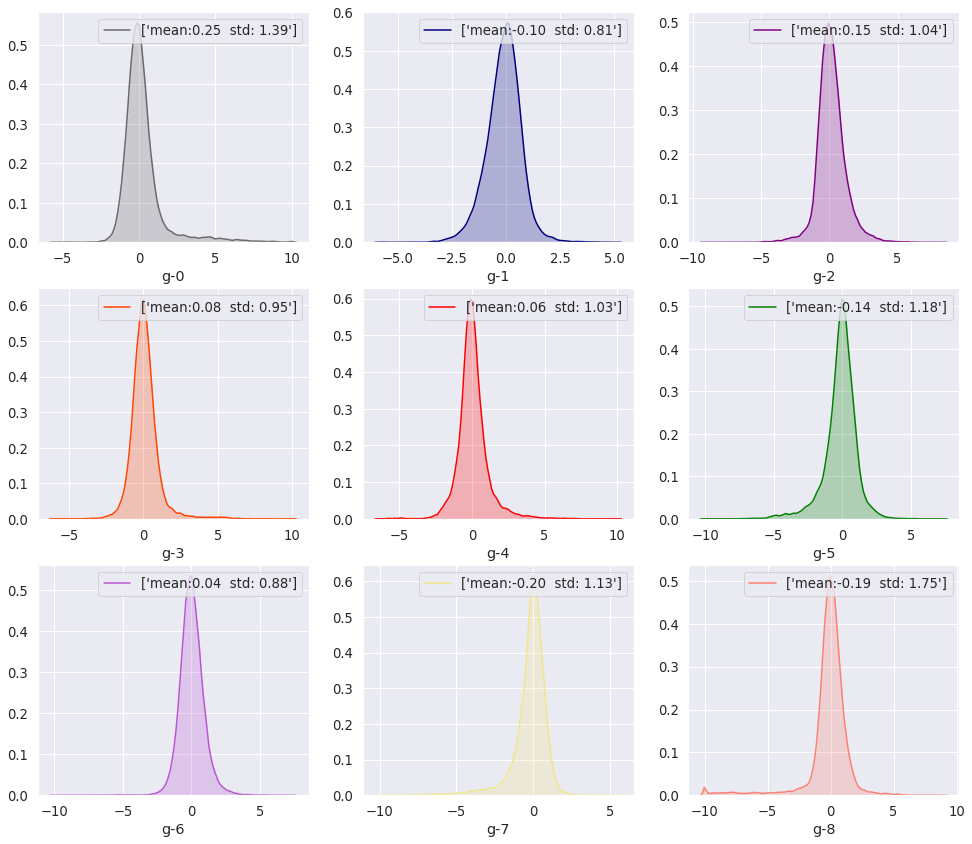

In [116]:
color = ['dimgray','navy','purple','orangered', 'red', 'green' ,'mediumorchid', 'khaki', 'salmon', 'blue','cornflowerblue','mediumseagreen']
 
color_ind=0
n_row = 6
n_col = 3
n_sub = 1 
plt.rcParams["legend.loc"] = 'upper right'
# loc properties ：'upper right', 'upper left', 'lower left', 'lower right', 
# 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'
fig = plt.figure(figsize=(8,14))
plt.subplots_adjust(left=-0.3, right=1.3,bottom=-0.3,top=1.3)
for i in (np.arange(0,9,1)):
    plt.subplot(n_row, n_col, n_sub)
    # 
    sns.kdeplot(train_features.loc[:,g_features[i]],color=color[color_ind],shade=True,
                 label=['mean:'+str('{:.2f}'.format(train_features.loc[:,g_features[i]].mean()))
                        +'  ''std: '+str('{:.2f}'.format(train_features.loc[:,g_features[i]].std()))])
    
    plt.xlabel(g_features[i])
    plt.legend()                    
    n_sub+=1
    color_ind+=1
plt.show()

# Cell viability features

In [117]:
c_features = [cols for cols in train_features.columns if cols.startswith('c-')]
#print(c_features)

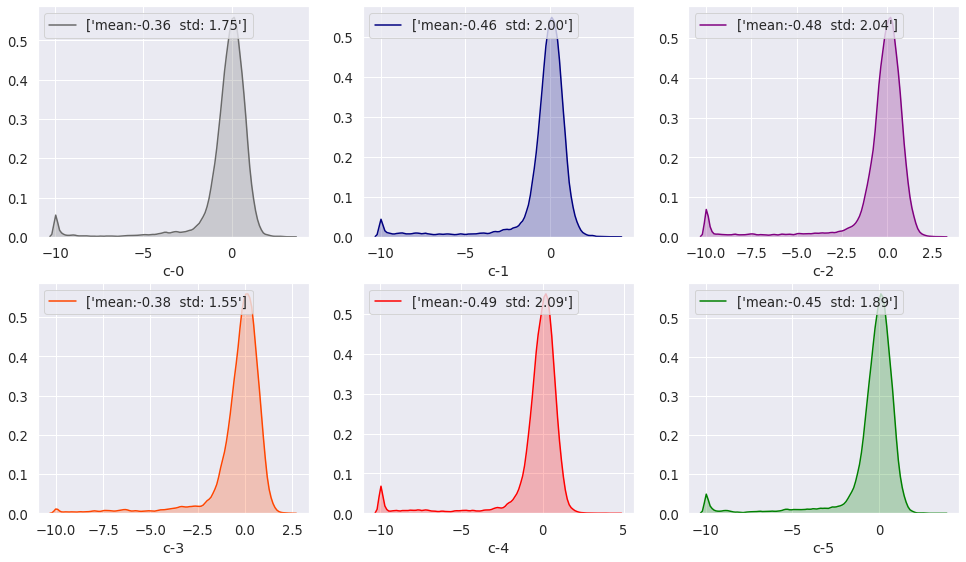

In [118]:
color = ['dimgray','navy','purple','orangered', 'red', 'green' ,'mediumorchid', 'khaki', 'salmon', 'blue','cornflowerblue','mediumseagreen']
 
color_ind=0
n_row = 6
n_col = 3
n_sub = 1 
plt.rcParams["legend.loc"] = 'upper left'
fig = plt.figure(figsize=(8,14))
plt.subplots_adjust(left=-0.3, right=1.3,bottom=-0.3,top=1.3)
for i in (np.arange(0,6,1)):
    plt.subplot(n_row, n_col, n_sub)
    sns.kdeplot(train_features.loc[:,c_features[i]],color=color[color_ind],shade=True,
                 label=['mean:'+str('{:.2f}'.format(train_features.loc[:,c_features[i]].mean()))
                        +'  ''std: '+str('{:.2f}'.format(train_features.loc[:,c_features[i]].std()))])
    
    plt.xlabel(c_features[i])
    plt.legend()                    
    n_sub+=1
    color_ind+=1
plt.show()

### from this result, we can see data are somehow normalized and also clipped at [-10,10].

# Cp_time and cp_dose

### cp_time and cp_dose indicate treatment duration (24,48,72) and dose (high or low which are D1 and D2)

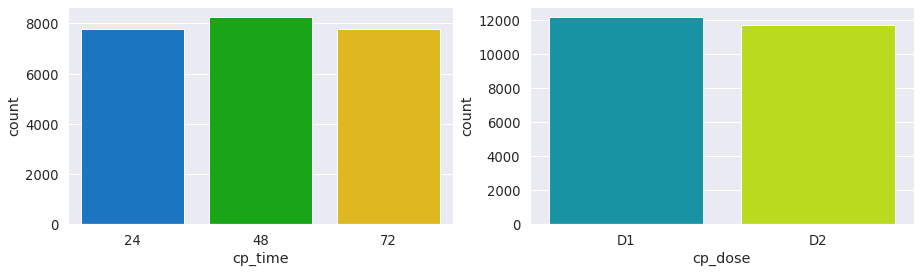

In [119]:
fig = plt.figure(figsize=(10,4))
plt.subplots_adjust(right=1.3)
plt.subplot(1, 2, 1)
sns.countplot(train_features['cp_time'],palette='nipy_spectral')
plt.subplot(1, 2, 2)
sns.countplot(train_features['cp_dose'],palette='nipy_spectral')
plt.show()

# Exploring some relationships

Next, we can use stripplot to show the relationship of a feature and a target with respect to dosage and time. Since, this is a multilabel probelm, we only show one label here, which is target 71. We will see later this target is contributing the most to the loss. For the feature, we chose two random g and c features. You may wanna do this with other features and labels to get more insight.

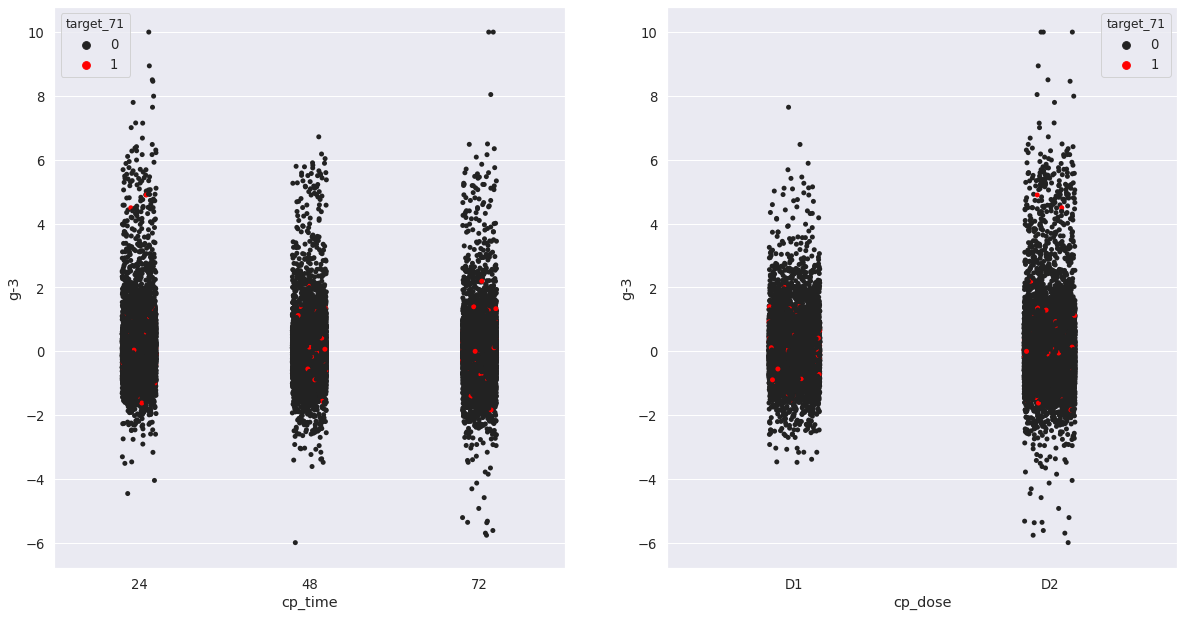

In [120]:
train_copy = train_features.copy()
train_copy['target_71'] = train_targets_scored.iloc[:,72]
# print(train_copy)
# print("---------------")
# print(train_copy['target_71'])
fig = plt.figure(figsize=(16,8))
plt.subplots_adjust(right=1.1, top=1.1)
ax1 = fig.add_subplot(121)
sns.stripplot(data= train_copy, x='cp_time', y='g-3',color='red',hue='target_71',ax=ax1)
ax2 = fig.add_subplot(122)
sns.stripplot(data = train_copy, x='cp_dose', y='g-3',color='red',hue='target_71',ax=ax2)
plt.show()

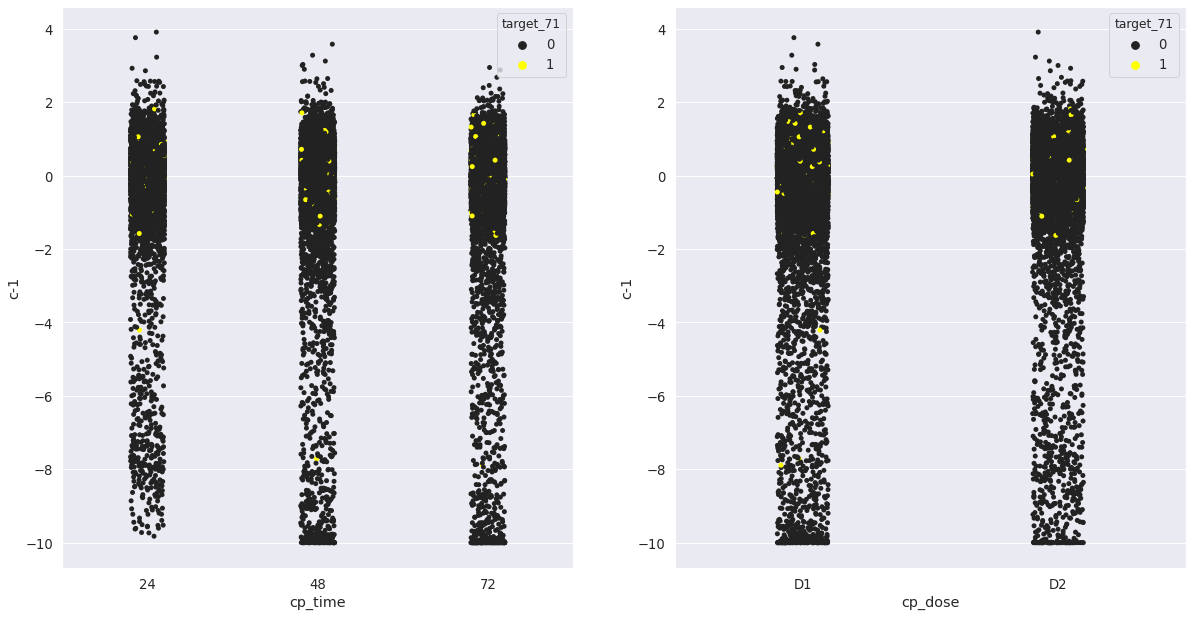

In [121]:
fig = plt.figure(figsize=(16,8))
plt.subplots_adjust(right=1.1,top=1.1)
ax1 = fig.add_subplot(121)
sns.stripplot(data= train_copy, x='cp_time', y= 'c-1',color='yellow', hue='target_71',ax=ax1)
ax2 = fig.add_subplot(122)
sns.stripplot(data= train_copy , x='cp_dose', y= 'c-1',color='yellow', hue='target_71',ax=ax2)
plt.show()

### we can get some insights from the figures above and apply it in our preprocessing step

# Targets

Below are some scored targets which are used to train the main model. As we can see, the targets are very imbalanced and there are only a few positive examples in some labels.

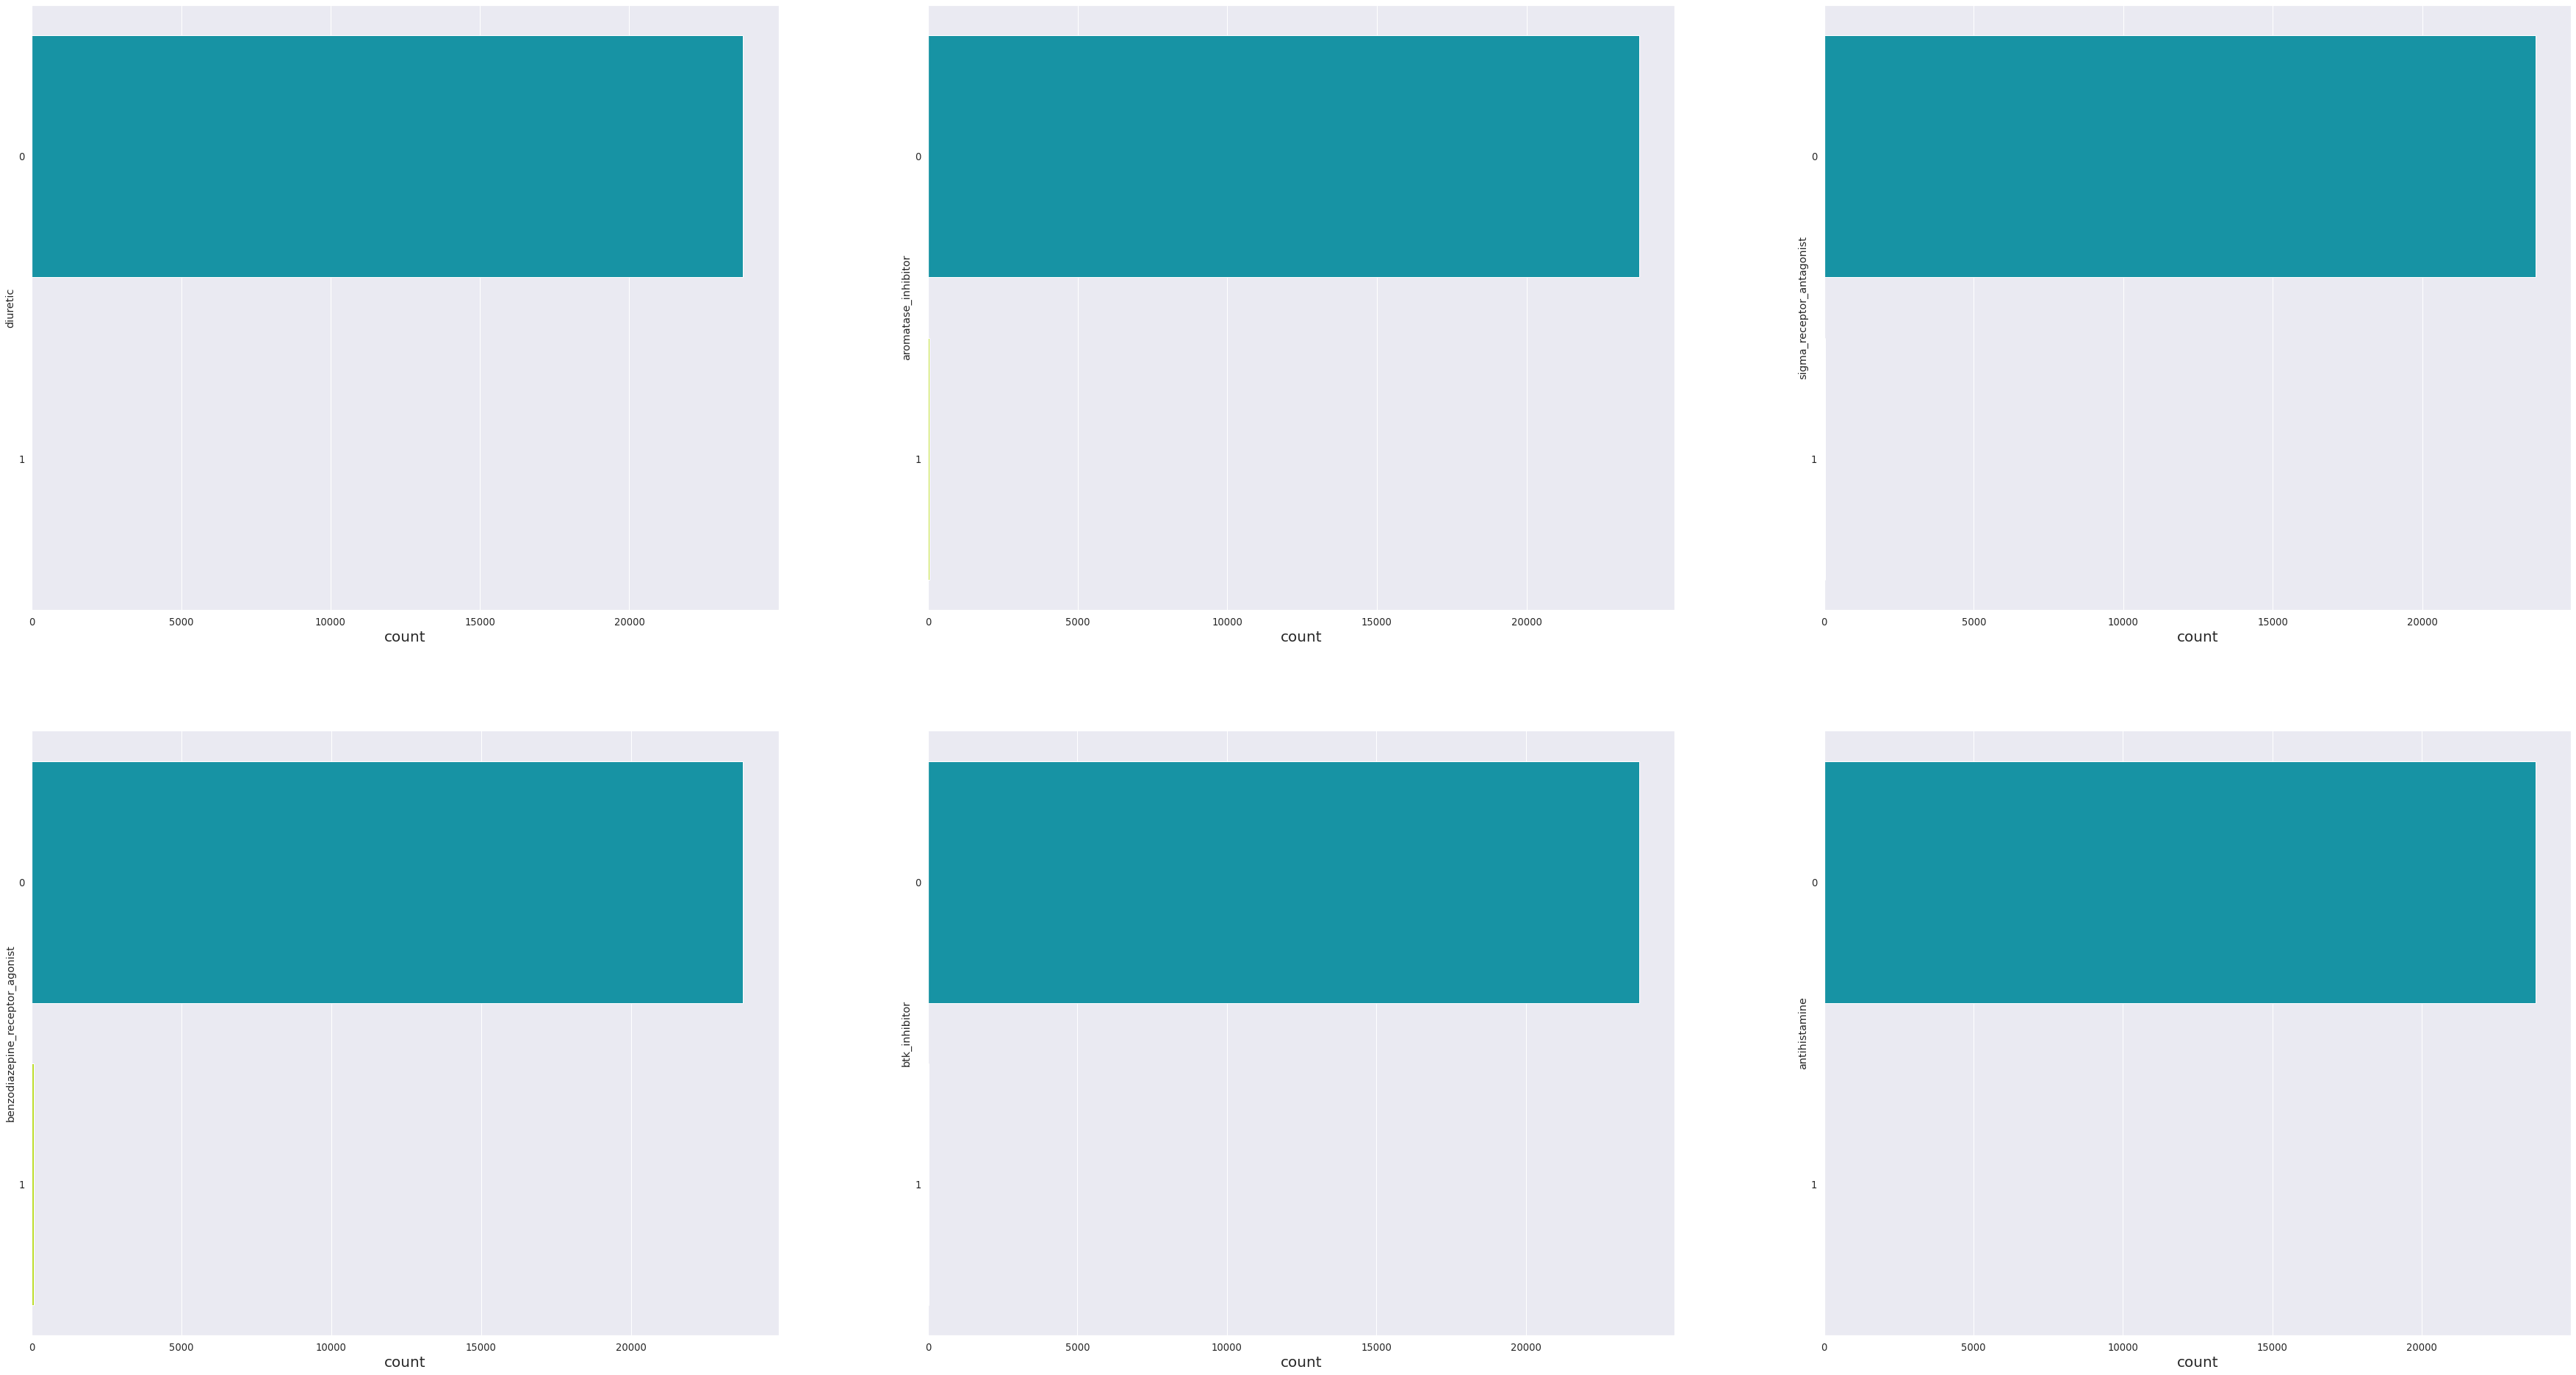

In [122]:
import sys
# import matplotlib; matplotlib.use('TkAgg')

target_s_copy = train_targets_scored.copy()
target_s_copy.drop('sig_id', axis=1, inplace=True)
n_row = 6
n_col = 3 
n_sub = 1   
# plt.xlabel("count",fontsize=20)
fig = plt.figure(figsize=(30,50))
fig.show()
plt.rcParams.update({"font.size":20})

plt.subplots_adjust(left=-0.3, right=1.3,bottom=-0.3,top=1.3)
for i in np.random.choice(np.arange(0,target_s_copy.shape[1],1),n_row):
    plt.subplot(n_row, n_col, n_sub)
#     plt.xticks(fontsize=20,rotation=90)
#     plt.yticks(fontsize=20)
    plt.xlabel("count",fontsize=20)
    # plt.ylabel("rate",fontsize=20)
    sns.countplot(y=target_s_copy.iloc[:, i],palette='nipy_spectral',orient='h')
    
#     plt.legend(fontsize=20)   # handles with labels found to put in legend
    n_sub+=1
plt.show()

## Let us see the 10 largest number of labels in the scored targets.

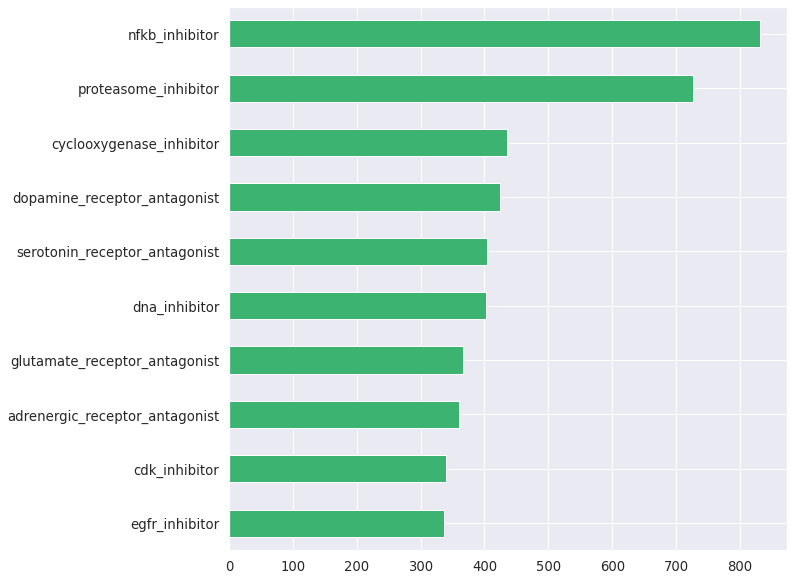

In [123]:
plt.figure(figsize=(10,10))
target_s_copy.sum().sort_values()[-10:].plot(kind='barh',color='mediumseagreen')
plt.show()

### And for the non-scored targets, we can find that some labels do not have positive examples at all

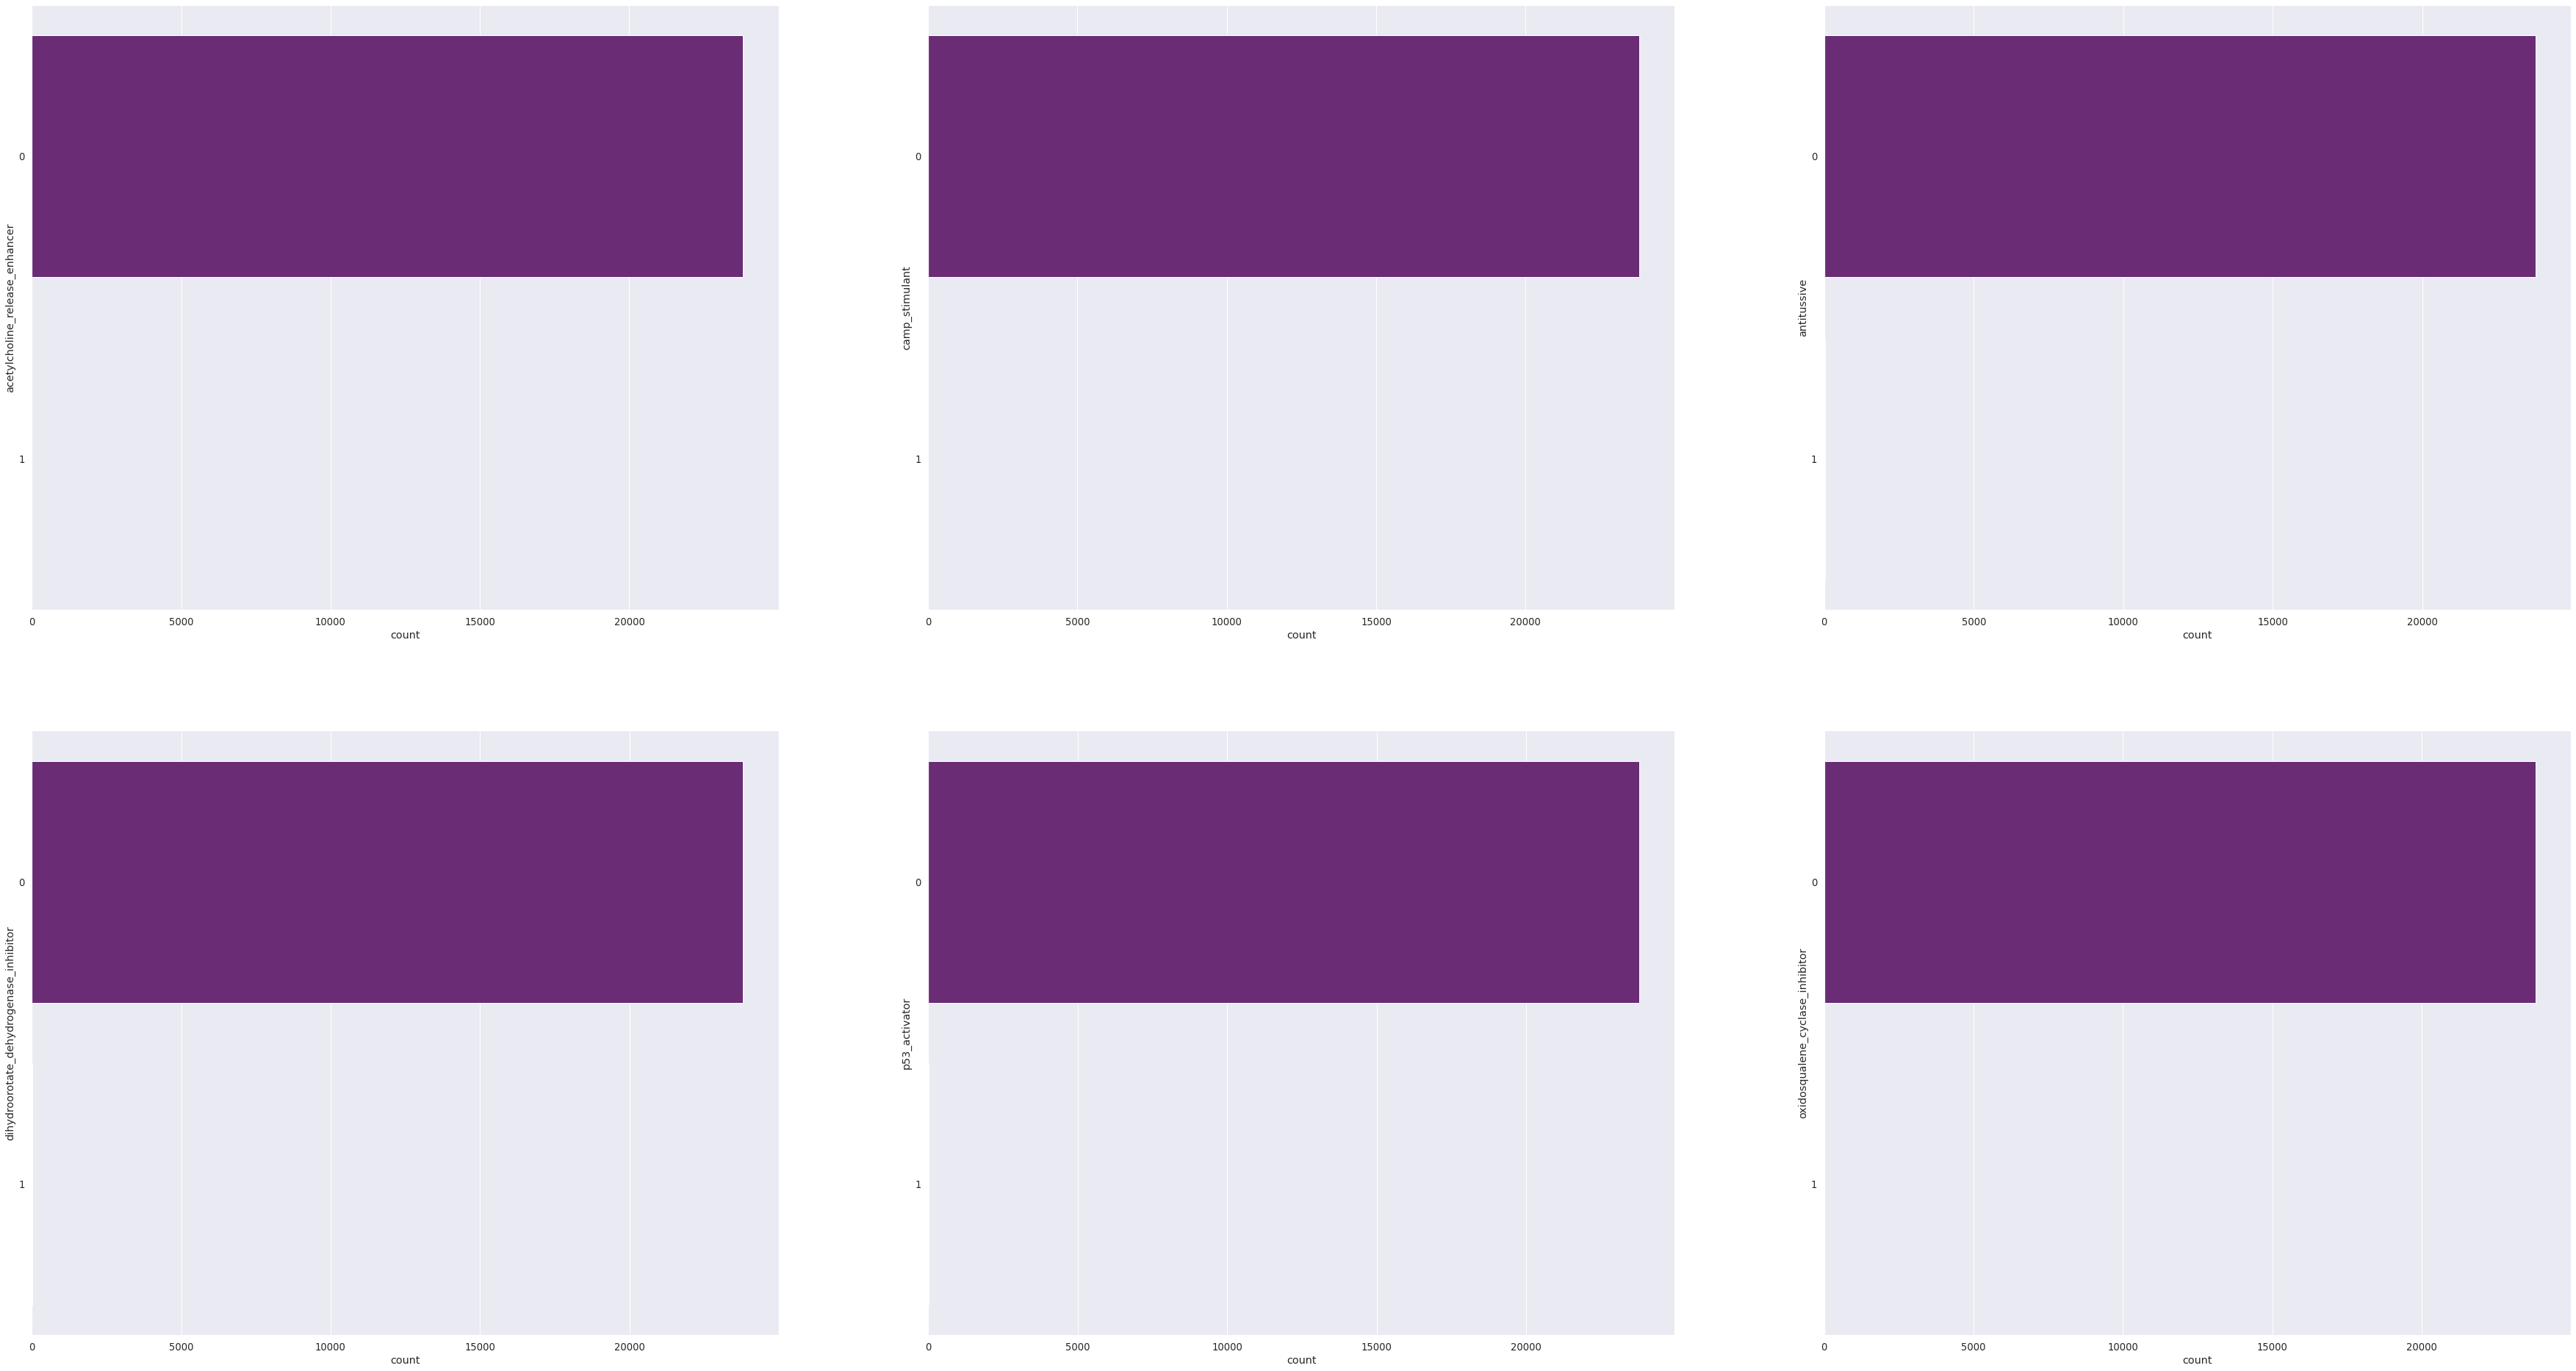

In [124]:
target_ns_copy = train_targets_nonscored.copy()
target_ns_copy.drop('sig_id',axis=1, inplace=True)
n_row = 6
n_col = 3
n_sub = 1
fig = plt.figure(figsize = (30,50))
plt.subplots_adjust(left=-0.3,right=1.3,bottom=-0.3,top=1.3)
for i in np.random.choice(np.arange(0,target_ns_copy.shape[1],1),n_row):
    plt.subplot(n_row, n_col, n_sub)
    sns.countplot(y=target_ns_copy.iloc[:,i], palette='magma',orient='h')
    # plt.legend()
    n_sub+=1
plt.show()

### And here is the 10 largest positive number of labels in the non-scored targets

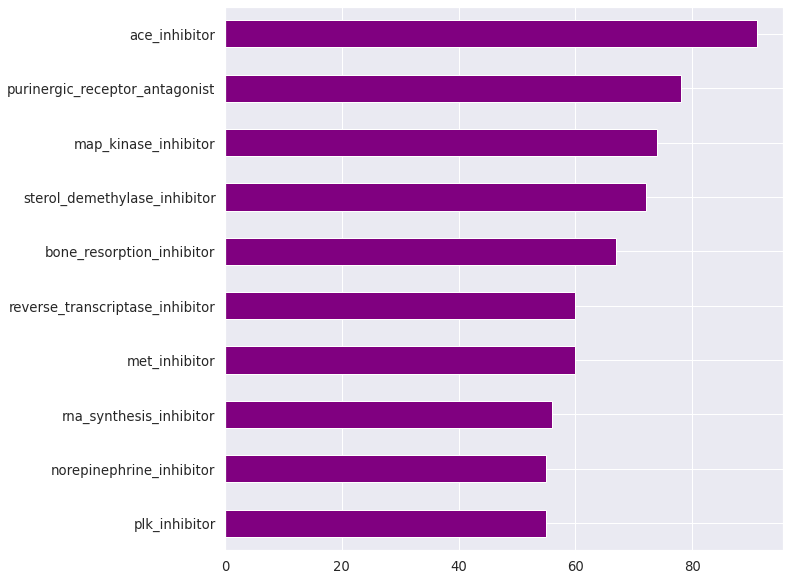

In [125]:
plt.figure(figsize=(10,10))
target_ns_copy.sum().sort_values()[-10:].plot(kind='barh',color='purple')
plt.show()

### As we can see, there are fewer positive examples in non-scored dataset

# Preprocessing and feature engineering

The control group is defined as the group in an experiment or study that does not have the desired effect or MoAs here; which means the target labels are zero for them. I will drop the data for this group, and we will later set all predictions of this group to zero.

we will keep track of the control group (ctl_vehicle) indexes. I dropped cp_type column and mapped the values of time and dose features. I performed some feature engineering based on the insights I got from the kaggle notebook. I also add methods of Rankgauss and PCA for this.

In [126]:
ind_tr = train_features[train_features['cp_type']=='ctl_vehicle'].index
ind_te = test_features[test_features['cp_type']=='ctl_vehicle'].index
print(ind_tr)
print(ind_te)
# print(train_features)

Int64Index([   25,    38,    40,    47,    63,    81,    96,   117,   133,
              148,
            ...
            23625, 23656, 23658, 23683, 23722, 23729, 23747, 23768, 23793,
            23811],
           dtype='int64', length=1866)
Int64Index([   2,    5,   26,   63,   84,   89,   90,   91,  110,  113,
            ...
            3915, 3924, 3926, 3929, 3934, 3935, 3944, 3957, 3963, 3972],
           dtype='int64', length=358)


In [127]:
from sklearn.preprocessing import QuantileTransformer

In [128]:
GENES = [col for col in train_features.columns if col.startswith('g-')]
CELLS = [col for col in train_features.columns if col.startswith('c-')]
# print(CELLS)
# print(GENES)

I'll check distribution of g- and c- of train and test set. They are spiky distribution rather than normal distribution. Regardless of the train and test, they look be in the same shape.

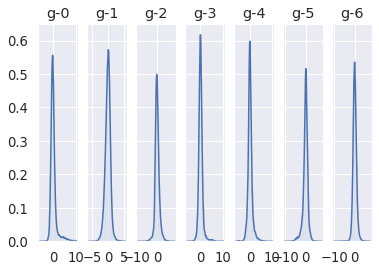

In [129]:
gnum = train_features[GENES].shape[1]
graphs = []

for i in range(0, gnum -1 , 7):
    #for least display.... 
    if i >= 3:
        break
    idxs = list(np.array([0, 1, 2, 3, 4, 5, 6]) + i)
    

    fig, axs = plt.subplots(1, 7, sharey=True)
    for k, item in enumerate(idxs):
        if item >=771:
            break
        graph = sns.distplot(train_features[GENES].values[:,item], ax=axs[k])
        graph.set_title(f"g-{item}")
        graphs.append(graph)

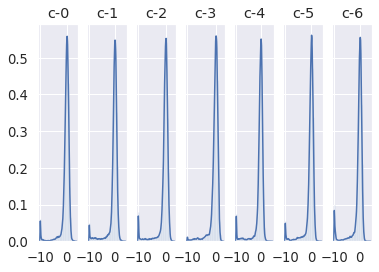

In [130]:
cnum = train_features[CELLS].shape[1]
graphs = []

for i in range(0, cnum -1 , 7):
    #for least display.... 
    if i >= 3:
        break
    idxs = list(np.array([0, 1, 2, 3, 4, 5, 6]) + i)
    

    fig, axs = plt.subplots(1, 7, sharey=True)
    for k, item in enumerate(idxs):
        if item >=100:
            break
        graph = sns.distplot(train_features[CELLS].values[:,item], ax=axs[k])
        graph.set_title(f"c-{item}")
        graphs.append(graph)


test set before using RankGauss

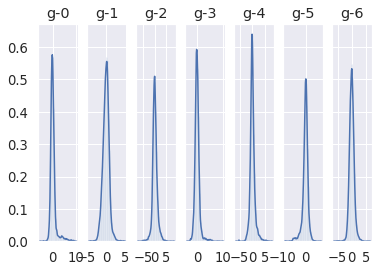

In [131]:
gnum = test_features[GENES].shape[1]
graphs = []

for i in range(0, gnum -1 , 7):
    #for least display.... 
    if i >= 3:
        break
    idxs = list(np.array([0, 1, 2, 3, 4, 5, 6]) + i)
    

    fig, axs = plt.subplots(1, 7, sharey=True)
    for k, item in enumerate(idxs):
        if item >=771:
            break
        graph = sns.distplot(test_features[GENES].values[:,item], ax=axs[k])
        graph.set_title(f"g-{item}")
        graphs.append(graph)

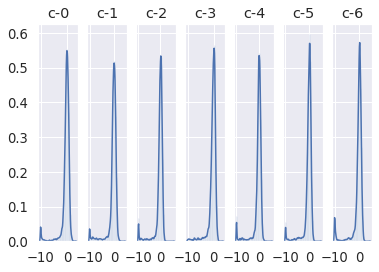

In [132]:
cnum = test_features[CELLS].shape[1]
graphs = []

for i in range(0, cnum -1 , 7):
    #for least display.... 
    if i >= 3:
        break
    idxs = list(np.array([0, 1, 2, 3, 4, 5, 6]) + i)
    

    fig, axs = plt.subplots(1, 7, sharey=True)
    for k, item in enumerate(idxs):
        if item >=100:
            break
        graph = sns.distplot(test_features[CELLS].values[:,item], ax=axs[k])
        graph.set_title(f"c-{item}")
        graphs.append(graph)

It may be a too simple idea, it appears that the gene expression data and cell viability data can be controlled by the experimenter, so it is safe to assume that these data are independent of each other.

Also, since the shape of the distribution is close to normal distribution to begin with, I don't think there is much of a problem if it is forced to be transformed into a Gaussian distribution.

In [133]:

for col in (GENES + CELLS):

    transformer = QuantileTransformer(n_quantiles=100,random_state=0, output_distribution="normal")
    vec_len = len(train_features[col].values)
    vec_len_test = len(test_features[col].values)
    raw_vec = train_features[col].values.reshape(vec_len, 1)
    transformer.fit(raw_vec)

    train_features[col] = transformer.transform(raw_vec).reshape(1, vec_len)[0]
    test_features[col] = transformer.transform(test_features[col].values.reshape(vec_len_test, 1)).reshape(1, vec_len_test)[0]

We can confirm that the shapes of data got close to the normal distribution.
## Train set after using RankGauss

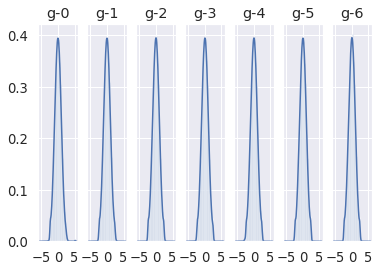

In [134]:
gnum = train_features[GENES].shape[1]
graphs = []

for i in range(0, gnum -1 , 7):
    #for least display.... 
    if i >= 3:
        break
    idxs = list(np.array([0, 1, 2, 3, 4, 5, 6]) + i)
    

    fig, axs = plt.subplots(1, 7, sharey=True)
    for k, item in enumerate(idxs):
        if item >=771:
            break
        graph = sns.distplot(train_features[GENES].values[:,item], ax=axs[k])
        graph.set_title(f"g-{item}")
        graphs.append(graph)

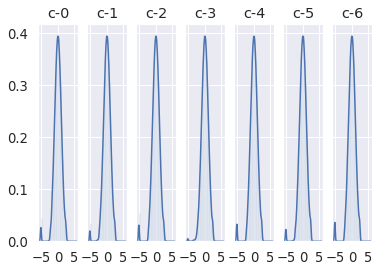

In [135]:
cnum = train_features[CELLS].shape[1]
graphs = []

for i in range(0, cnum -1 , 7):
    #for least display.... 
    if i >= 3:
        break
    idxs = list(np.array([0, 1, 2, 3, 4, 5, 6]) + i)
    

    fig, axs = plt.subplots(1, 7, sharey=True)
    for k, item in enumerate(idxs):
        if item >=100:
            break
        graph = sns.distplot(train_features[CELLS].values[:,item], ax=axs[k])
        graph.set_title(f"c-{item}")
        graphs.append(graph)

## test set after using RankGauss

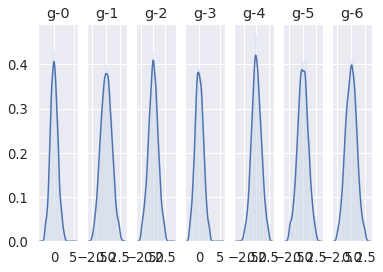

In [136]:
gnum = test_features[GENES].shape[1]
graphs = []

for i in range(0, gnum -1 , 7):
    #for least display.... 
    if i >= 3:
        break
    idxs = list(np.array([0, 1, 2, 3, 4, 5, 6]) + i)
    

    fig, axs = plt.subplots(1, 7, sharey=True)
    for k, item in enumerate(idxs):
        if item >=771:
            break
        graph = sns.distplot(test_features[GENES].values[:,item], ax=axs[k])
        graph.set_title(f"g-{item}")
        graphs.append(graph)


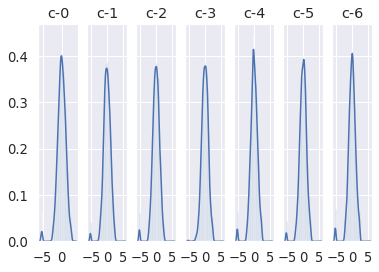

In [137]:
cnum = test_features[CELLS].shape[1]
graphs = []

for i in range(0, cnum -1 , 7):
    #for least display.... 
    if i >= 3:
        break
    idxs = list(np.array([0, 1, 2, 3, 4, 5, 6]) + i)
    

    fig, axs = plt.subplots(1, 7, sharey=True)
    for k, item in enumerate(idxs):
        if item >=100:
            break
        graph = sns.distplot(test_features[CELLS].values[:,item], ax=axs[k])
        graph.set_title(f"c-{item}")
        graphs.append(graph)

It appears that we were able to transform the distribution of each data to resemble a normal distribution, as intended.

So, let's enter the data into the benchmarking method to see the improvement.

## K-means cluster analysis

### 1) Kmeans Analysis for Gene features (Elbow Method and Silhouette Coefficient)

In [138]:
from tqdm.notebook import tqdm
from sklearn.cluster import KMeans
import plotly.express as px

In [139]:
train = pd.read_csv('../input/lish-moa/train_features.csv')
test = pd.read_csv('../input/lish-moa/test_features.csv')

GENES = [col for col in train.columns if 'g-' in col]
CELLS = [col for col in train.columns if 'c-' in col]

In [140]:
g_SSE = []
for i in tqdm(range(5,250,5)):
    k_train = train[GENES].copy()
    k_test = test[GENES].copy()
    k_data = pd.concat([k_train, k_test], axis = 0)
    kmeans = KMeans(n_clusters = i, init='k-means++', n_init=5, max_iter=50, tol=1e-04,random_state = 77)
    kmeans.fit(k_data)
    g_SSE.append(kmeans.inertia_)
    
df_g = pd.DataFrame({"gene_SSE":g_SSE,
                    'num':list(range(5,250,5))})

fig = px.line(df_g, x = 'num', y = "gene_SSE",
             title = "gene's SSE of some clusters")
fig.show()

As we can see from graph above, elbow method does not provide a clear result since there's no elbow point. Let's use Silhouette Coefficient method instead.

In [141]:
from sklearn.metrics import silhouette_score

sil_scores = []
for i in tqdm(range(5,250,5)):
    k_train = train[GENES].copy()
    k_test = test[GENES].copy()
    k_data = pd.concat([k_train, k_test], axis = 0)
    kmeans = KMeans(n_clusters = i, init='k-means++', n_init=5, max_iter=50, tol=1e-04,random_state = 77)
    kmeans.fit(k_data)
    labels=kmeans.predict(k_data)
    sil_scores.append(silhouette_score(k_data, labels))

df_g = pd.DataFrame({"silhouette scores":sil_scores,
                    'num':list(range(5,250,5))})

fig = px.line(df_g, x = 'num', y = "silhouette scores",
             title = "gene's Silhoute Score of some clusters")
fig.show()

From graph above, we can see that there's a greatest peak at k = 20, so ideal number of clusters to try is around 20.

### 2) Kmeans Analysis for Cell features

In [142]:
c_SSE = []
for i in tqdm(range(2, 100, 2)):
    k_train = train[CELLS].copy()
    k_test = test[CELLS].copy()
    k_data = pd.concat([k_train, k_test], axis = 0)
    kmeans = KMeans(n_clusters = i, init='k-means++', n_init=5, max_iter=50, tol=1e-04,random_state = 77)
    kmeans.fit(k_data)
    c_SSE.append(kmeans.inertia_)

df_c = pd.DataFrame({"cell_SSE":c_SSE,
                    'num':list(range(2, 100, 2))})

fig = px.line(df_c, x = 'num', y = "cell_SSE",
             title = "cell's SSE of some clusters")
fig.show()

From graph above, we can see that using elbow method, ideal value for k is 4 - 6

# Model 1: Keans + NN

### PCA features + Variance Threshold

In [143]:
import random
import os
import copy
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [144]:
!pip install /kaggle/input/iterative-stratification/iterative-stratification-master/
# install iterative-stratification-master 
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

Processing /kaggle/input/iterative-stratification/iterative-stratification-master
  Created wheel for iterative-stratification: filename=iterative_stratification-0.1.6-py3-none-any.whl size=8401 sha256=60dc52052d630f4daa3d7121f0f1a5a9b3bc263acf9725dcea44f8529bd6e136
  Stored in directory: /root/.cache/pip/wheels/b8/47/3f/eb4af42d124f37d23d6f13a4c8bbc32c1d70140e6e1cecb4aa
Successfully built iterative-stratification
  Attempting uninstall: iterative-stratification
    Found existing installation: iterative-stratification 0.1.6
    Uninstalling iterative-stratification-0.1.6:
      Successfully uninstalled iterative-stratification-0.1.6


In [145]:
data_dir = '../input/lish-moa/'
train_features = pd.read_csv(data_dir + 'train_features.csv')
train_targets_scored = pd.read_csv(data_dir + 'train_targets_scored.csv')
train_targets_nonscored = pd.read_csv(data_dir + 'train_targets_nonscored.csv')
train_drug = pd.read_csv(data_dir + 'train_drug.csv')
test_features = pd.read_csv(data_dir + 'test_features.csv')
sample_submission = pd.read_csv(data_dir + 'sample_submission.csv')
train_features2=train_features.copy()
test_features2=test_features.copy()
GENES = [col for col in train_features.columns if col.startswith('g-')]
CELLS = [col for col in train_features.columns if col.startswith('c-')]

In [146]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import QuantileTransformer

transformer = QuantileTransformer(n_quantiles=100,random_state=42, output_distribution="normal")
df_train = train_features
df_test = test_features
df_target_s = train_targets_scored
df_target_ns = train_targets_nonscored
def preprocess(df):
    df['cp_time'] = df['cp_time'].map({24:1, 48:2, 72:3})
    df['cp_dose'] = df['cp_dose'].map({'D1':0, 'D2':1})
    g_features = [cols for cols in df.columns if cols.startswith('g-')]
    c_features = [cols for cols in df.columns if cols.startswith('c-')]
    for col in (g_features + c_features):
        vec_len = len(df[col].values)
        raw_vec = df[col].values.reshape(vec_len, 1)
        transformer.fit(raw_vec)
        df[col] = transformer.transform(raw_vec).reshape(1, vec_len)[0]
    return df

X = preprocess(df_train)
# print(X) [23814 rows x 876 columns]
X_test = preprocess(df_test)

display(X.head(5))
print('Train data size', X.shape)
display(X_test.head(3))
print('Test data size', X_test.shape)
y = df_target_s.drop('sig_id', axis=1)
display(y.head(3))
print('target size', y.shape)
y0 =  df_target_ns.drop('sig_id', axis=1)

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,1,0,1.134849,0.907687,-0.416385,-0.966814,-0.254723,-1.017473,...,0.410974,0.364819,1.291804,0.835350,-0.240101,1.021706,-0.499652,0.317989,0.545662,0.641339
1,id_000779bfc,trt_cp,3,0,0.119282,0.681738,0.272399,0.080113,1.205169,0.686517,...,-0.520372,1.127405,0.716111,0.054620,0.412012,0.744215,0.210242,0.179684,0.919161,1.165833
2,id_000a6266a,trt_cp,2,0,0.779973,0.946463,1.425350,-0.132928,-0.006122,1.492493,...,-0.828896,-0.740965,0.953239,0.053633,-1.213056,-0.394118,-0.758652,-0.277635,-1.123088,1.089235
3,id_0015fd391,trt_cp,2,0,-0.734910,-0.274641,-0.438509,0.759097,2.346330,-0.858153,...,-1.419080,-0.756098,-1.652159,-1.250427,-0.947092,-1.231225,-1.325697,-0.977581,-0.485139,-0.915321
4,id_001626bd3,trt_cp,3,1,-0.452718,-0.477513,0.972316,0.970731,1.463427,-0.869555,...,0.018697,0.002153,1.051051,1.682158,0.796356,-0.378324,0.153519,0.428792,-0.475464,1.119408


Train data size (23814, 876)


,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_0004d9e33,trt_cp,1,0,-0.755294,0.214796,-0.774511,0.705349,1.564580,-0.194968,...,0.116890,1.194732,-0.195260,-0.298039,-0.301677,-0.128405,-0.036089,-0.094841,0.153376,-0.920303
1,id_001897cda,trt_cp,3,0,-0.186773,0.374643,1.176402,-0.652299,-0.546638,-0.403447,...,-0.183415,-0.269845,-1.059129,-1.317859,-0.466468,-0.653500,-0.015480,-0.621168,-1.191952,-0.880456
2,id_002429b5b,ctl_vehicle,1,0,0.351229,-0.155308,-0.613250,0.255053,-1.762152,0.333321,...,-0.328362,0.463214,-1.233935,1.310102,-1.429491,-1.093671,1.239167,1.577578,0.681627,-0.241098


Test data size (3982, 876)


,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


target size (23814, 206)


In [147]:
# # Please see reference 3 for this part
# g_features = [cols for cols in X.columns if cols.startswith('g-')]
# n_comp = 1

# data = pd.concat([pd.DataFrame(X[g_features]), pd.DataFrame(X_test[g_features])])
# data2 = (PCA(1, random_state=42).fit_transform(data[g_features]))
# # use X to train PCA model and return the data after dimension reduction
# # newX=pca.fit_transform(X)，newX is the data after dimension reduction
# # the segregation of dataset, form the dataset, form the model
# # if want to re-implement the result, random_state is very important to be fixed
# train2 = data2[:X.shape[0]]
# # n_components is 1，copy default is True，it's seen that raw data does not change

# print(X.shape[1]) 
# test2 = data2[-X_test.shape[0]:]

# train2 = pd.DataFrame(train2, columns=[f'pca_g-{i}' for i in range(data2.shape[1])])
# test2 = pd.DataFrame(test2, columns=[f'pca_g-{i}' for i in range(data2.shape[1])])
# print(train2) #[23814 rows x 50 columns]
# # print(test2) [3982 rows x 50 columns]

# # print(X)[23814 rows x 5808 columns]
# X = pd.concat((X, train2), axis=1)
# #  axis = 0, represent connect in horizontal direction； axis = 1, represent connect in vertical direction 
# # print(X) [23814 rows x 4596 columns] 4596 = 876+
# X_test = pd.concat((X_test, test2), axis=1)


In [148]:
# GENES
n_comp = 600  # try different as long as 
# main compositions that PCA remains -> number of features remained
data = pd.concat([pd.DataFrame(train_features[GENES]), pd.DataFrame(test_features[GENES])])
data2 = (PCA(n_components=n_comp, random_state=42).fit_transform(data[GENES]))
train2 = data2[:train_features.shape[0]]; test2 = data2[-test_features.shape[0]:]

train_gpca = pd.DataFrame(train2, columns=[f'pca_G-{i}' for i in range(n_comp)])
test_gpca = pd.DataFrame(test2, columns=[f'pca_G-{i}' for i in range(n_comp)])

train_features = pd.concat((train_features, train_gpca), axis=1)
test_features = pd.concat((test_features, test_gpca), axis=1)
# print(train_features)
# [23814 rows x 1476 columns]
# print(test_features)
# [3982 rows x 1476 columns]


In [149]:
#CELLS
n_comp = 50  #<--Update
# main compositions that PCA remains -> number of features remained
data = pd.concat([pd.DataFrame(train_features[CELLS]), pd.DataFrame(test_features[CELLS])])
data2 = (PCA(n_components=n_comp, random_state=42).fit_transform(data[CELLS]))
train2 = data2[:train_features.shape[0]]; test2 = data2[-test_features.shape[0]:]

train_cpca = pd.DataFrame(train2, columns=[f'pca_C-{i}' for i in range(n_comp)])
test_cpca = pd.DataFrame(test2, columns=[f'pca_C-{i}' for i in range(n_comp)])

train_features = pd.concat((train_features, train_cpca), axis=1)
test_features = pd.concat((test_features, test_cpca), axis=1)
# print(train_features) 
# [23814 rows x 1526 columns]
# print(test_features)
# [3982 rows x 1526 columns]

In [150]:
from sklearn.feature_selection import VarianceThreshold


var_thresh = VarianceThreshold(0.8)  #<-- Update
data = train_features.append(test_features)
data_transformed = var_thresh.fit_transform(data.iloc[:, 4:])

train_features_transformed = data_transformed[ : train_features.shape[0]]
test_features_transformed = data_transformed[-test_features.shape[0] : ]


train_features=pd.DataFrame(train_features[['sig_id','cp_type','cp_time','cp_dose']].values.reshape(-1, 4),\
                              columns=['sig_id','cp_type','cp_time','cp_dose'])

train_features = pd.concat([train_features, pd.DataFrame(train_features_transformed)], axis=1)


test_features = pd.DataFrame(test_features[['sig_id','cp_type','cp_time','cp_dose']].values.reshape(-1, 4),\
                             columns=['sig_id','cp_type','cp_time','cp_dose'])

test_features = pd.concat([test_features, pd.DataFrame(test_features_transformed)], axis=1)

train_features.shape

(23814, 1042)

In [151]:
from sklearn.cluster import KMeans
def fe_cluster(train, test, n_clusters_g = 22, n_clusters_c = 4, SEED = 42):
    
    features_g = GENES
    features_c = CELLS
    
    def create_cluster(train, test, features, kind = 'g', n_clusters = n_clusters_g):
        train_ = train[features].copy()
        test_ = test[features].copy()
        data = pd.concat([train_, test_], axis = 0)
        kmeans = KMeans(n_clusters = n_clusters, random_state = SEED).fit(data)
        train[f'clusters_{kind}'] = kmeans.labels_[:train.shape[0]]
        test[f'clusters_{kind}'] = kmeans.labels_[train.shape[0]:]
        train = pd.get_dummies(train, columns = [f'clusters_{kind}'])
        test = pd.get_dummies(test, columns = [f'clusters_{kind}'])
        return train, test
    
    train, test = create_cluster(train, test, features_g, kind = 'g', n_clusters = n_clusters_g)
    train, test = create_cluster(train, test, features_c, kind = 'c', n_clusters = n_clusters_c)
    return train, test

train_features2 ,test_features2=fe_cluster(train_features2,test_features2)

In [152]:
train_pca=pd.concat((train_gpca,train_cpca),axis=1)
test_pca=pd.concat((test_gpca,test_cpca),axis=1)

### Combine PCA and Cluster 

In [153]:
def fe_cluster_pca(train, test,n_clusters=5,SEED = 42):
        data=pd.concat([train,test],axis=0)
        kmeans = KMeans(n_clusters = n_clusters, random_state = SEED).fit(data)
        train[f'clusters_pca'] = kmeans.labels_[:train.shape[0]]
        test[f'clusters_pca'] = kmeans.labels_[train.shape[0]:]
        train = pd.get_dummies(train, columns = [f'clusters_pca'])
        test = pd.get_dummies(test, columns = [f'clusters_pca'])
        return train, test
train_cluster_pca ,test_cluster_pca = fe_cluster_pca(train_pca,test_pca)

In [154]:
train_features_cluster=train_features2.iloc[:,876:]
test_features_cluster=test_features2.iloc[:,876:]

In [155]:
gsquarecols=['g-574','g-211','g-216','g-0','g-255','g-577','g-153','g-389','g-60','g-370','g-248','g-167','g-203','g-177','g-301','g-332','g-517','g-6','g-744','g-224','g-162','g-3','g-736','g-486','g-283','g-22','g-359','g-361','g-440','g-335','g-106','g-307','g-745','g-146','g-416','g-298','g-666','g-91','g-17','g-549','g-145','g-157','g-768','g-568','g-396']

### Some stats about gene and cell data

In [156]:
def fe_stats(train, test):
    
    features_g = GENES
    features_c = CELLS
    
    for df in train, test:
        df['g_sum'] = df[features_g].sum(axis = 1)
        df['g_mean'] = df[features_g].mean(axis = 1)
        df['g_std'] = df[features_g].std(axis = 1)
        df['g_kurt'] = df[features_g].kurtosis(axis = 1)
        df['g_skew'] = df[features_g].skew(axis = 1)
        df['c_sum'] = df[features_c].sum(axis = 1)
        df['c_mean'] = df[features_c].mean(axis = 1)
        df['c_std'] = df[features_c].std(axis = 1)
        df['c_kurt'] = df[features_c].kurtosis(axis = 1)
        df['c_skew'] = df[features_c].skew(axis = 1)
        df['gc_sum'] = df[features_g + features_c].sum(axis = 1)
        df['gc_mean'] = df[features_g + features_c].mean(axis = 1)
        df['gc_std'] = df[features_g + features_c].std(axis = 1)
        df['gc_kurt'] = df[features_g + features_c].kurtosis(axis = 1)
        df['gc_skew'] = df[features_g + features_c].skew(axis = 1)

        df['c52_c42'] = df['c-52'] * df['c-42']
        df['c13_c73'] = df['c-13'] * df['c-73']
        df['c26_c13'] = df['c-23'] * df['c-13']
        df['c33_c6'] = df['c-33'] * df['c-6']
        df['c11_c55'] = df['c-11'] * df['c-55']
        df['c38_c63'] = df['c-38'] * df['c-63']
        df['c38_c94'] = df['c-38'] * df['c-94']
        df['c13_c94'] = df['c-13'] * df['c-94']
        df['c4_c52'] = df['c-4'] * df['c-52']
        df['c4_c42'] = df['c-4'] * df['c-42']
        df['c13_c38'] = df['c-13'] * df['c-38']
        df['c55_c2'] = df['c-55'] * df['c-2']
        df['c55_c4'] = df['c-55'] * df['c-4']
        df['c4_c13'] = df['c-4'] * df['c-13']
        df['c82_c42'] = df['c-82'] * df['c-42']
        df['c66_c42'] = df['c-66'] * df['c-42']
        df['c6_c38'] = df['c-6'] * df['c-38']
        df['c2_c13'] = df['c-2'] * df['c-13']
        df['c62_c42'] = df['c-62'] * df['c-42']
        df['c90_c55'] = df['c-90'] * df['c-55']

        for feature in features_c:
             df[f'{feature}_squared'] = df[feature] ** 2     
                
        for feature in gsquarecols:
            df[f'{feature}_squared'] = df[feature] ** 2        
        
    return train, test

train_features2,test_features2=fe_stats(train_features2,test_features2)

### Merge features and drop cp_type since it is trivial(sample size of one of the two types is so small)

In [157]:
train_features_stats=train_features2.iloc[:,902:]
test_features_stats=test_features2.iloc[:,902:]
train_features = pd.concat((train_features, train_features_cluster,train_cluster_pca,train_features_stats), axis=1)
test_features = pd.concat((test_features, test_features_cluster,test_cluster_pca,test_features_stats), axis=1)

In [158]:
train = train_features.merge(train_targets_scored, on='sig_id')
train = train.merge(train_targets_nonscored, on='sig_id')
train = train.merge(train_drug, on='sig_id')
train = train[train['cp_type'] != 'ctl_vehicle'].reset_index(drop=True)
test = test_features[test_features['cp_type'] != 'ctl_vehicle'].reset_index(drop=True)
train = train.drop('cp_type', axis=1)
test = test.drop('cp_type', axis=1)

In [159]:
target_cols = [x for x in train_targets_scored.columns if x != 'sig_id']
aux_target_cols = [x for x in train_targets_nonscored.columns if x != 'sig_id']
all_target_cols = target_cols + aux_target_cols

num_targets = len(target_cols)
num_aux_targets = len(aux_target_cols)
num_all_targets = len(all_target_cols)

# print('num_targets: {}'.format(num_targets))
# print('num_aux_targets: {}'.format(num_aux_targets))
# print('num_all_targets: {}'.format(num_all_targets))

# Apply our first model - NN(Neural Network) method using Pytorch

## Define Dataset

In [160]:
class MoADataset:
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets
        
    def __len__(self):
        return (self.features.shape[0])
    
    def __getitem__(self, idx):
        dct = {
            'x' : torch.tensor(self.features[idx, :], dtype=torch.float),
            'y' : torch.tensor(self.targets[idx, :], dtype=torch.float)
        }
        
        return dct
    
class TestDataset:
    def __init__(self, features):
        self.features = features
        
    def __len__(self):
        return (self.features.shape[0])
    
    def __getitem__(self, idx):
        dct = {
            'x' : torch.tensor(self.features[idx, :], dtype=torch.float)
        }

        return dct

## Define our main training functions

In [161]:
# This is our main training function. 
def train_fn(model, optimizer, scheduler, loss_fn, dataloader, device):
    model.train()
    final_loss = 0
    
    for data in dataloader:
        optimizer.zero_grad()
        inputs, targets = data['x'].to(device), data['y'].to(device)
        outputs = model(inputs)
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()
        scheduler.step()

        final_loss += loss.item()
        
    final_loss /= len(dataloader)
    return final_loss

In [162]:
# This is our validation function.
def valid_fn(model, loss_fn, dataloader, device):
    model.eval()
    final_loss = 0
    valid_preds = []
    
    for data in dataloader:
        inputs, targets = data['x'].to(device), data['y'].to(device)
        outputs = model(inputs)
        loss = loss_fn(outputs, targets)

        final_loss += loss.item()
        valid_preds.append(outputs.sigmoid().detach().cpu().numpy())
        
    final_loss /= len(dataloader)
    valid_preds = np.concatenate(valid_preds)
    return final_loss, valid_preds

In [163]:
# This function is for later use. We might do model interference at the end. 
def inference_fn(model, dataloader, device):
    model.eval()
    preds = []
    
    for data in dataloader:
        inputs = data['x'].to(device)

        with torch.no_grad():
            outputs = model(inputs)
        
        preds.append(outputs.sigmoid().detach().cpu().numpy())
        
    preds = np.concatenate(preds)
    return preds

In [164]:
# This is label smoothing functions. 
import torch
from torch.nn.modules.loss import _WeightedLoss
import torch.nn.functional as F

class SmoothBCEwLogits(_WeightedLoss):
    def __init__(self, weight=None, reduction='mean', smoothing=0.0):
        super().__init__(weight=weight, reduction=reduction)
        self.smoothing = smoothing
        self.weight = weight
        self.reduction = reduction

    @staticmethod
    def _smooth(targets:torch.Tensor, n_labels:int, smoothing=0.0):
        assert 0 <= smoothing < 1

        with torch.no_grad():
            targets = targets * (1.0 - smoothing) + 0.5 * smoothing
            
        return targets

    def forward(self, inputs, targets):
        targets = SmoothBCEwLogits._smooth(targets, inputs.size(-1),
            self.smoothing)
        loss = F.binary_cross_entropy_with_logits(inputs, targets,self.weight)

        if  self.reduction == 'sum':
            loss = loss.sum()
        elif  self.reduction == 'mean':
            loss = loss.mean()

        return loss

# Model 

### We use bash normalization for neural network model so that our model will be more stable. We also apply label smoothing and scheduler so that we won't overfitting due to bash normalization.

In [165]:
# Model Initialization
class Model(nn.Module):
    def __init__(self, num_features, num_targets):
        super(Model, self).__init__()
        self.hidden_size = [1500, 1250, 1000, 750]
        self.dropout_value = [0.5, 0.35, 0.3, 0.25]

        self.batch_norm1 = nn.BatchNorm1d(num_features)
        self.dense1 = nn.Linear(num_features, self.hidden_size[0])
        
        self.batch_norm2 = nn.BatchNorm1d(self.hidden_size[0])
        self.dropout2 = nn.Dropout(self.dropout_value[0])
        self.dense2 = nn.Linear(self.hidden_size[0], self.hidden_size[1])

        self.batch_norm3 = nn.BatchNorm1d(self.hidden_size[1])
        self.dropout3 = nn.Dropout(self.dropout_value[1])
        self.dense3 = nn.Linear(self.hidden_size[1], self.hidden_size[2])

        self.batch_norm4 = nn.BatchNorm1d(self.hidden_size[2])
        self.dropout4 = nn.Dropout(self.dropout_value[2])
        self.dense4 = nn.Linear(self.hidden_size[2], self.hidden_size[3])

        self.batch_norm5 = nn.BatchNorm1d(self.hidden_size[3])
        self.dropout5 = nn.Dropout(self.dropout_value[3])
        self.dense5 = nn.utils.weight_norm(nn.Linear(self.hidden_size[3], num_targets))
    
    # we use relu function for forward propagation
    def forward(self, x):
        x = self.batch_norm1(x)
        x = F.leaky_relu(self.dense1(x))
        
        x = self.batch_norm2(x)
        x = self.dropout2(x)
        x = F.leaky_relu(self.dense2(x))

        x = self.batch_norm3(x)
        x = self.dropout3(x)
        x = F.leaky_relu(self.dense3(x))

        x = self.batch_norm4(x)
        x = self.dropout4(x)
        x = F.leaky_relu(self.dense4(x))

        x = self.batch_norm5(x)
        x = self.dropout5(x)
        x = self.dense5(x)
        return x

In [166]:
# define label smoothihg class
class LabelSmoothingLoss(nn.Module):

    # initialization
    def __init__(self, classes, smoothing=0.0, dim=-1):
        super(LabelSmoothingLoss, self).__init__()
        self.confidence = 1.0 - smoothing
        self.smoothing = smoothing
        self.cls = classes
        self.dim = dim
        
    # forward propagation
    def forward(self, pred, target):
        pred = pred.log_softmax(dim=self.dim)

        with torch.no_grad():
            true_dist = torch.zeros_like(pred)
            true_dist.fill_(self.smoothing / (self.cls - 1))
            true_dist.scatter_(1, target.data.unsqueeze(1), self.confidence)
            
        return torch.mean(torch.sum(-true_dist * pred, dim=self.dim))

In [167]:
# define scheduler
class FineTuneScheduler:
    def __init__(self, epochs):
        self.epochs = epochs
        self.epochs_per_step = 0
        self.frozen_layers = []

    def copy_without_top(self, model, num_features, num_targets, num_targets_new):
        self.frozen_layers = []

        model_new = Model(num_features, num_targets)
        model_new.load_state_dict(model.state_dict())

        # Freeze all weights
        for name, param in model_new.named_parameters():
            layer_index = name.split('.')[0][-1]

            if layer_index == 5:
                continue

            param.requires_grad = False

            # Save frozen layer names
            if layer_index not in self.frozen_layers:
                self.frozen_layers.append(layer_index)

            self.epochs_per_step = self.epochs // len(self.frozen_layers)

        # Replace the top layers with another ones
        model_new.batch_norm5 = nn.BatchNorm1d(model_new.hidden_size[3])
        model_new.dropout5 = nn.Dropout(model_new.dropout_value[3])
        model_new.dense5 = nn.utils.weight_norm(nn.Linear(model_new.hidden_size[-1], num_targets_new))
        model_new.to(DEVICE)
        return model_new

    def step(self, epoch, model):
        if len(self.frozen_layers) == 0:
            return

        if epoch % self.epochs_per_step == 0:
            last_frozen_index = self.frozen_layers[-1]
            
            # Unfreeze parameters of the last frozen layer
            for name, param in model.named_parameters():
                layer_index = name.split('.')[0][-1]

                if layer_index == last_frozen_index:
                    param.requires_grad = True

            del self.frozen_layers[-1]  # Remove the last layer as unfrozen

# Preprocessing and Setup HyperParameters

In [168]:
def process_data(data):
    data = pd.get_dummies(data, columns=['cp_time','cp_dose'])
    return data

In [169]:
feature_cols = [c for c in process_data(train).columns if c not in all_target_cols]
feature_cols = [c for c in feature_cols if c not in ['kfold', 'sig_id', 'drug_id']]
num_features = len(feature_cols)
num_features


1904

In [170]:
# HyperParameters

DEVICE = ('cuda' if torch.cuda.is_available() else 'cpu')
EPOCHS = 24
BATCH_SIZE = 128

WEIGHT_DECAY = {'ALL_TARGETS': 1e-5, 'SCORED_ONLY': 3e-6}
MAX_LR = {'ALL_TARGETS': 1e-2, 'SCORED_ONLY': 3e-3}
DIV_FACTOR = {'ALL_TARGETS': 1e3, 'SCORED_ONLY': 1e2}
PCT_START = 0.1

model = Model(num_features, num_all_targets)

# K-Folds Training

In [171]:
# we use k-folds CV to help us determine how our model performs
# idea is we further split test data into k groups and choose one of them to be test data and the rest to apply training model

from sklearn.model_selection import KFold

# A seed value specifies a particular stream from a set of possible random number streams.
def make_cv_folds(train, SEEDS, NFOLDS, DRUG_THRESH):
    vc = train.drug_id.value_counts()
    vc1 = vc.loc[vc <= DRUG_THRESH].index.sort_values()
    vc2 = vc.loc[vc > DRUG_THRESH].index.sort_values()

    for seed_id in range(SEEDS):
        kfold_col = 'kfold_{}'.format(seed_id)
        
        # STRATIFY DRUGS 
        dct1 = {}
        dct2 = {}

        skf = MultilabelStratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=seed_id)
        tmp = train.groupby('drug_id')[target_cols].mean().loc[vc1]

        for fold,(idxT, idxV) in enumerate(skf.split(tmp, tmp[target_cols])):
            dd = {k: fold for k in tmp.index[idxV].values}
            dct1.update(dd)

        # STRATIFY DRUGS 
        skf = MultilabelStratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=seed_id)
        tmp = train.loc[train.drug_id.isin(vc2)].reset_index(drop=True)

        for fold,(idxT, idxV) in enumerate(skf.split(tmp, tmp[target_cols])):
            dd = {k: fold for k in tmp.sig_id[idxV].values}
            dct2.update(dd)

        # ASSIGN FOLDS
        train[kfold_col] = train.drug_id.map(dct1)
        train.loc[train[kfold_col].isna(), kfold_col] = train.loc[train[kfold_col].isna(), 'sig_id'].map(dct2)
        train[kfold_col] = train[kfold_col].astype('int8')
        
    return train

SEEDS = 7
NFOLDS = 7
DRUG_THRESH = 18

train = make_cv_folds(train, SEEDS, NFOLDS, DRUG_THRESH)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning:

Pass shuffle=True, random_state=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning:

Pass shuffle=True, random_state=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning:

Pass shuffle=True, random_state=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning:

Pass shuffle=True, random_state=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning:

Pass shuffle=True, random_state=2 as 

## Run training model

In [172]:
# a function that generate a seed value
def seed_everything(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)

    if torch.cuda.is_available(): 
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False
    
seed_everything(42)

In [173]:
def run_training(fold_id, seed_id):
    seed_everything(seed_id)
    
    train_ = process_data(train)
    test_ = process_data(test)
    
    kfold_col = f'kfold_{seed_id}'
    trn_idx = train_[train_[kfold_col] != fold_id].index
    val_idx = train_[train_[kfold_col] == fold_id].index
    
    train_df = train_[train_[kfold_col] != fold_id].reset_index(drop=True)
    valid_df = train_[train_[kfold_col] == fold_id].reset_index(drop=True)

    def train_model(model, tag_name, target_cols_now, fine_tune_scheduler=None):
        x_train, y_train  = train_df[feature_cols].values, train_df[target_cols_now].values
        x_valid, y_valid =  valid_df[feature_cols].values, valid_df[target_cols_now].values
        
        train_dataset = MoADataset(x_train, y_train)
        valid_dataset = MoADataset(x_valid, y_valid)

        trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
        validloader = torch.utils.data.DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)
        
        optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=WEIGHT_DECAY[tag_name])
        scheduler = optim.lr_scheduler.OneCycleLR(optimizer=optimizer,
                                                  steps_per_epoch=len(trainloader),
                                                  pct_start=PCT_START,
                                                  div_factor=DIV_FACTOR[tag_name], 
                                                  max_lr=MAX_LR[tag_name],
                                                  epochs=EPOCHS)
        
        loss_fn = nn.BCEWithLogitsLoss()
        loss_tr = SmoothBCEwLogits(smoothing=0.001)

        oof = np.zeros((len(train), len(target_cols_now)))
        best_loss = np.inf

        # tune scheduler for improving performance
        for epoch in range(EPOCHS):
            if fine_tune_scheduler is not None:
                fine_tune_scheduler.step(epoch, model)

            train_loss = train_fn(model, optimizer, scheduler, loss_tr, trainloader, DEVICE)
            valid_loss, valid_preds = valid_fn(model, loss_fn, validloader, DEVICE)
            print(f"SEED: {seed_id}, FOLD: {fold_id}, {tag_name}, EPOCH: {epoch}, train_loss: {train_loss:.6f}, valid_loss: {valid_loss:.6f}")

            if np.isnan(valid_loss):
                break
            
            if valid_loss < best_loss:
                best_loss = valid_loss
                oof[val_idx] = valid_preds
                torch.save(model.state_dict(), f"{tag_name}_FOLD{fold_id}_.pth")

        return oof

    fine_tune_scheduler = FineTuneScheduler(EPOCHS)
    
    pretrained_model = Model(num_features, num_all_targets)
    pretrained_model.to(DEVICE)

    # Train on scored + nonscored targets
    train_model(pretrained_model, 'ALL_TARGETS', all_target_cols)

    # Load the pretrained model with the best loss
    pretrained_model = Model(num_features, num_all_targets)
    pretrained_model.load_state_dict(torch.load(f"ALL_TARGETS_FOLD{fold_id}_.pth"))
    pretrained_model.to(DEVICE)

    # Copy model without the top layer
    final_model = fine_tune_scheduler.copy_without_top(pretrained_model, num_features, num_all_targets, num_targets)

    # Fine-tune the model on scored targets only
    oof = train_model(final_model, 'SCORED_ONLY', target_cols, fine_tune_scheduler)

    # Load the fine-tuned model with the best loss
    model = Model(num_features, num_targets)
    model.load_state_dict(torch.load(f"SCORED_ONLY_FOLD{fold_id}_.pth"))
    model.to(DEVICE)

    # Prediction
    x_test = test_[feature_cols].values
    testdataset = TestDataset(x_test)
    testloader = torch.utils.data.DataLoader(testdataset, batch_size=BATCH_SIZE, shuffle=False)
    
    predictions = np.zeros((len(test_), num_targets))
    predictions = inference_fn(model, testloader, DEVICE)
    return oof, predictions


In [174]:
def run_k_fold(NFOLDS, seed_id):
    oof = np.zeros((len(train), len(target_cols)))
    predictions = np.zeros((len(test), len(target_cols)))
    
    for fold_id in range(NFOLDS):
        oof_, pred_ = run_training(fold_id, seed_id)
        predictions += pred_ / NFOLDS
        oof += oof_
        
    return oof, predictions

In [175]:
from time import time

# Averaging on multiple SEEDS
SEED = [0, 1, 2, 3, 4, 5, 6]
oof = np.zeros((len(train), len(target_cols)))
predictions = np.zeros((len(test), len(target_cols)))

time_begin = time()

for seed_id in SEED:
    oof_, predictions_ = run_k_fold(NFOLDS, seed_id)
    oof += oof_ / len(SEED)
    predictions += predictions_ / len(SEED)

time_diff = time() - time_begin

train[target_cols] = oof
test[target_cols] = predictions

SEED: 0, FOLD: 0, ALL_TARGETS, EPOCH: 0, train_loss: 0.496352, valid_loss: 0.019357
SEED: 0, FOLD: 0, ALL_TARGETS, EPOCH: 1, train_loss: 0.015520, valid_loss: 0.009929
SEED: 0, FOLD: 0, ALL_TARGETS, EPOCH: 2, train_loss: 0.013290, valid_loss: 0.009234
SEED: 0, FOLD: 0, ALL_TARGETS, EPOCH: 3, train_loss: 0.013914, valid_loss: 0.009332
SEED: 0, FOLD: 0, ALL_TARGETS, EPOCH: 4, train_loss: 0.013170, valid_loss: 0.009249
SEED: 0, FOLD: 0, ALL_TARGETS, EPOCH: 5, train_loss: 0.012979, valid_loss: 0.009122
SEED: 0, FOLD: 0, ALL_TARGETS, EPOCH: 6, train_loss: 0.012941, valid_loss: 0.009281
SEED: 0, FOLD: 0, ALL_TARGETS, EPOCH: 7, train_loss: 0.012920, valid_loss: 0.009328
SEED: 0, FOLD: 0, ALL_TARGETS, EPOCH: 8, train_loss: 0.012870, valid_loss: 0.009045
SEED: 0, FOLD: 0, ALL_TARGETS, EPOCH: 9, train_loss: 0.012861, valid_loss: 0.009038
SEED: 0, FOLD: 0, ALL_TARGETS, EPOCH: 10, train_loss: 0.012859, valid_loss: 0.009006
SEED: 0, FOLD: 0, ALL_TARGETS, EPOCH: 11, train_loss: 0.012837, valid_loss:

SEED: 0, FOLD: 2, ALL_TARGETS, EPOCH: 1, train_loss: 0.015288, valid_loss: 0.010560
SEED: 0, FOLD: 2, ALL_TARGETS, EPOCH: 2, train_loss: 0.013438, valid_loss: 0.011229
SEED: 0, FOLD: 2, ALL_TARGETS, EPOCH: 3, train_loss: 0.013401, valid_loss: 0.009824
SEED: 0, FOLD: 2, ALL_TARGETS, EPOCH: 4, train_loss: 0.012850, valid_loss: 0.009780
SEED: 0, FOLD: 2, ALL_TARGETS, EPOCH: 5, train_loss: 0.012803, valid_loss: 0.010011
SEED: 0, FOLD: 2, ALL_TARGETS, EPOCH: 6, train_loss: 0.012795, valid_loss: 0.009724
SEED: 0, FOLD: 2, ALL_TARGETS, EPOCH: 7, train_loss: 0.012772, valid_loss: 0.009899
SEED: 0, FOLD: 2, ALL_TARGETS, EPOCH: 8, train_loss: 0.012747, valid_loss: 0.009874
SEED: 0, FOLD: 2, ALL_TARGETS, EPOCH: 9, train_loss: 0.012732, valid_loss: 0.009826
SEED: 0, FOLD: 2, ALL_TARGETS, EPOCH: 10, train_loss: 0.012748, valid_loss: 0.009739
SEED: 0, FOLD: 2, ALL_TARGETS, EPOCH: 11, train_loss: 0.012710, valid_loss: 0.009729
SEED: 0, FOLD: 2, ALL_TARGETS, EPOCH: 12, train_loss: 0.012726, valid_loss

SEED: 0, FOLD: 4, ALL_TARGETS, EPOCH: 2, train_loss: 0.013198, valid_loss: 0.009585
SEED: 0, FOLD: 4, ALL_TARGETS, EPOCH: 3, train_loss: 0.012955, valid_loss: 0.009425
SEED: 0, FOLD: 4, ALL_TARGETS, EPOCH: 4, train_loss: 0.012829, valid_loss: 0.009468
SEED: 0, FOLD: 4, ALL_TARGETS, EPOCH: 5, train_loss: 0.012825, valid_loss: 0.009713
SEED: 0, FOLD: 4, ALL_TARGETS, EPOCH: 6, train_loss: 0.012840, valid_loss: 0.009415
SEED: 0, FOLD: 4, ALL_TARGETS, EPOCH: 7, train_loss: 0.012788, valid_loss: 0.009427
SEED: 0, FOLD: 4, ALL_TARGETS, EPOCH: 8, train_loss: 0.012801, valid_loss: 0.009412
SEED: 0, FOLD: 4, ALL_TARGETS, EPOCH: 9, train_loss: 0.012798, valid_loss: 0.009415
SEED: 0, FOLD: 4, ALL_TARGETS, EPOCH: 10, train_loss: 0.012742, valid_loss: 0.009363
SEED: 0, FOLD: 4, ALL_TARGETS, EPOCH: 11, train_loss: 0.012748, valid_loss: 0.009533
SEED: 0, FOLD: 4, ALL_TARGETS, EPOCH: 12, train_loss: 0.012711, valid_loss: 0.009403
SEED: 0, FOLD: 4, ALL_TARGETS, EPOCH: 13, train_loss: 0.012696, valid_los

SEED: 0, FOLD: 6, ALL_TARGETS, EPOCH: 3, train_loss: 0.012884, valid_loss: 0.011069
SEED: 0, FOLD: 6, ALL_TARGETS, EPOCH: 4, train_loss: 0.012765, valid_loss: 0.009778
SEED: 0, FOLD: 6, ALL_TARGETS, EPOCH: 5, train_loss: 0.012783, valid_loss: 0.009772
SEED: 0, FOLD: 6, ALL_TARGETS, EPOCH: 6, train_loss: 0.012964, valid_loss: 0.009766
SEED: 0, FOLD: 6, ALL_TARGETS, EPOCH: 7, train_loss: 0.012720, valid_loss: 0.009898
SEED: 0, FOLD: 6, ALL_TARGETS, EPOCH: 8, train_loss: 0.012773, valid_loss: 0.009797
SEED: 0, FOLD: 6, ALL_TARGETS, EPOCH: 9, train_loss: 0.012741, valid_loss: 0.009900
SEED: 0, FOLD: 6, ALL_TARGETS, EPOCH: 10, train_loss: 0.012737, valid_loss: 0.009784
SEED: 0, FOLD: 6, ALL_TARGETS, EPOCH: 11, train_loss: 0.012704, valid_loss: 0.009935
SEED: 0, FOLD: 6, ALL_TARGETS, EPOCH: 12, train_loss: 0.012734, valid_loss: 0.009703
SEED: 0, FOLD: 6, ALL_TARGETS, EPOCH: 13, train_loss: 0.012643, valid_loss: 0.009706
SEED: 0, FOLD: 6, ALL_TARGETS, EPOCH: 14, train_loss: 0.012606, valid_lo

SEED: 1, FOLD: 1, ALL_TARGETS, EPOCH: 4, train_loss: 0.012808, valid_loss: 0.009483
SEED: 1, FOLD: 1, ALL_TARGETS, EPOCH: 5, train_loss: 0.013090, valid_loss: 0.009795
SEED: 1, FOLD: 1, ALL_TARGETS, EPOCH: 6, train_loss: 0.012850, valid_loss: 0.009557
SEED: 1, FOLD: 1, ALL_TARGETS, EPOCH: 7, train_loss: 0.012835, valid_loss: 0.009817
SEED: 1, FOLD: 1, ALL_TARGETS, EPOCH: 8, train_loss: 0.012802, valid_loss: 0.009566
SEED: 1, FOLD: 1, ALL_TARGETS, EPOCH: 9, train_loss: 0.012808, valid_loss: 0.009467
SEED: 1, FOLD: 1, ALL_TARGETS, EPOCH: 10, train_loss: 0.012800, valid_loss: 0.009368
SEED: 1, FOLD: 1, ALL_TARGETS, EPOCH: 11, train_loss: 0.012759, valid_loss: 0.009391
SEED: 1, FOLD: 1, ALL_TARGETS, EPOCH: 12, train_loss: 0.012751, valid_loss: 0.009486
SEED: 1, FOLD: 1, ALL_TARGETS, EPOCH: 13, train_loss: 0.012750, valid_loss: 0.009411
SEED: 1, FOLD: 1, ALL_TARGETS, EPOCH: 14, train_loss: 0.012682, valid_loss: 0.009277
SEED: 1, FOLD: 1, ALL_TARGETS, EPOCH: 15, train_loss: 0.012613, valid_l

SEED: 1, FOLD: 3, ALL_TARGETS, EPOCH: 5, train_loss: 0.012826, valid_loss: 0.009322
SEED: 1, FOLD: 3, ALL_TARGETS, EPOCH: 6, train_loss: 0.012759, valid_loss: 0.009522
SEED: 1, FOLD: 3, ALL_TARGETS, EPOCH: 7, train_loss: 0.012783, valid_loss: 0.009528
SEED: 1, FOLD: 3, ALL_TARGETS, EPOCH: 8, train_loss: 0.012766, valid_loss: 0.009834
SEED: 1, FOLD: 3, ALL_TARGETS, EPOCH: 9, train_loss: 0.012802, valid_loss: 0.009552
SEED: 1, FOLD: 3, ALL_TARGETS, EPOCH: 10, train_loss: 0.012741, valid_loss: 0.009579
SEED: 1, FOLD: 3, ALL_TARGETS, EPOCH: 11, train_loss: 0.012733, valid_loss: 0.009477
SEED: 1, FOLD: 3, ALL_TARGETS, EPOCH: 12, train_loss: 0.012711, valid_loss: 0.009561
SEED: 1, FOLD: 3, ALL_TARGETS, EPOCH: 13, train_loss: 0.012654, valid_loss: 0.009516
SEED: 1, FOLD: 3, ALL_TARGETS, EPOCH: 14, train_loss: 0.012631, valid_loss: 0.009568
SEED: 1, FOLD: 3, ALL_TARGETS, EPOCH: 15, train_loss: 0.012599, valid_loss: 0.009319
SEED: 1, FOLD: 3, ALL_TARGETS, EPOCH: 16, train_loss: 0.012523, valid_

SEED: 1, FOLD: 5, ALL_TARGETS, EPOCH: 6, train_loss: 0.012743, valid_loss: 0.009722
SEED: 1, FOLD: 5, ALL_TARGETS, EPOCH: 7, train_loss: 0.012738, valid_loss: 0.009772
SEED: 1, FOLD: 5, ALL_TARGETS, EPOCH: 8, train_loss: 0.012748, valid_loss: 0.009706
SEED: 1, FOLD: 5, ALL_TARGETS, EPOCH: 9, train_loss: 0.012714, valid_loss: 0.009804
SEED: 1, FOLD: 5, ALL_TARGETS, EPOCH: 10, train_loss: 0.012689, valid_loss: 0.009865
SEED: 1, FOLD: 5, ALL_TARGETS, EPOCH: 11, train_loss: 0.012696, valid_loss: 0.009711
SEED: 1, FOLD: 5, ALL_TARGETS, EPOCH: 12, train_loss: 0.012655, valid_loss: 0.009734
SEED: 1, FOLD: 5, ALL_TARGETS, EPOCH: 13, train_loss: 0.012626, valid_loss: 0.009618
SEED: 1, FOLD: 5, ALL_TARGETS, EPOCH: 14, train_loss: 0.012592, valid_loss: 0.009802
SEED: 1, FOLD: 5, ALL_TARGETS, EPOCH: 15, train_loss: 0.012529, valid_loss: 0.009724
SEED: 1, FOLD: 5, ALL_TARGETS, EPOCH: 16, train_loss: 0.012490, valid_loss: 0.009540
SEED: 1, FOLD: 5, ALL_TARGETS, EPOCH: 17, train_loss: 0.012396, valid

SEED: 2, FOLD: 0, ALL_TARGETS, EPOCH: 7, train_loss: 0.012676, valid_loss: 0.010407
SEED: 2, FOLD: 0, ALL_TARGETS, EPOCH: 8, train_loss: 0.012670, valid_loss: 0.010195
SEED: 2, FOLD: 0, ALL_TARGETS, EPOCH: 9, train_loss: 0.012685, valid_loss: 0.010350
SEED: 2, FOLD: 0, ALL_TARGETS, EPOCH: 10, train_loss: 0.012651, valid_loss: 0.010162
SEED: 2, FOLD: 0, ALL_TARGETS, EPOCH: 11, train_loss: 0.012635, valid_loss: 0.010284
SEED: 2, FOLD: 0, ALL_TARGETS, EPOCH: 12, train_loss: 0.012611, valid_loss: 0.010090
SEED: 2, FOLD: 0, ALL_TARGETS, EPOCH: 13, train_loss: 0.012585, valid_loss: 0.010084
SEED: 2, FOLD: 0, ALL_TARGETS, EPOCH: 14, train_loss: 0.012550, valid_loss: 0.010153
SEED: 2, FOLD: 0, ALL_TARGETS, EPOCH: 15, train_loss: 0.012499, valid_loss: 0.010046
SEED: 2, FOLD: 0, ALL_TARGETS, EPOCH: 16, train_loss: 0.012446, valid_loss: 0.009969
SEED: 2, FOLD: 0, ALL_TARGETS, EPOCH: 17, train_loss: 0.012375, valid_loss: 0.009942
SEED: 2, FOLD: 0, ALL_TARGETS, EPOCH: 18, train_loss: 0.012289, vali

SEED: 2, FOLD: 2, ALL_TARGETS, EPOCH: 8, train_loss: 0.012812, valid_loss: 0.009434
SEED: 2, FOLD: 2, ALL_TARGETS, EPOCH: 9, train_loss: 0.012779, valid_loss: 0.009408
SEED: 2, FOLD: 2, ALL_TARGETS, EPOCH: 10, train_loss: 0.012729, valid_loss: 0.009325
SEED: 2, FOLD: 2, ALL_TARGETS, EPOCH: 11, train_loss: 0.012739, valid_loss: 0.009333
SEED: 2, FOLD: 2, ALL_TARGETS, EPOCH: 12, train_loss: 0.012730, valid_loss: 0.009306
SEED: 2, FOLD: 2, ALL_TARGETS, EPOCH: 13, train_loss: 0.012701, valid_loss: 0.009391
SEED: 2, FOLD: 2, ALL_TARGETS, EPOCH: 14, train_loss: 0.012666, valid_loss: 0.009213
SEED: 2, FOLD: 2, ALL_TARGETS, EPOCH: 15, train_loss: 0.012570, valid_loss: 0.009223
SEED: 2, FOLD: 2, ALL_TARGETS, EPOCH: 16, train_loss: 0.012528, valid_loss: 0.009167
SEED: 2, FOLD: 2, ALL_TARGETS, EPOCH: 17, train_loss: 0.012457, valid_loss: 0.009136
SEED: 2, FOLD: 2, ALL_TARGETS, EPOCH: 18, train_loss: 0.012363, valid_loss: 0.009066
SEED: 2, FOLD: 2, ALL_TARGETS, EPOCH: 19, train_loss: 0.012240, val

SEED: 2, FOLD: 4, ALL_TARGETS, EPOCH: 9, train_loss: 0.012775, valid_loss: 0.009454
SEED: 2, FOLD: 4, ALL_TARGETS, EPOCH: 10, train_loss: 0.012755, valid_loss: 0.009352
SEED: 2, FOLD: 4, ALL_TARGETS, EPOCH: 11, train_loss: 0.012772, valid_loss: 0.009405
SEED: 2, FOLD: 4, ALL_TARGETS, EPOCH: 12, train_loss: 0.012732, valid_loss: 0.009392
SEED: 2, FOLD: 4, ALL_TARGETS, EPOCH: 13, train_loss: 0.012718, valid_loss: 0.009367
SEED: 2, FOLD: 4, ALL_TARGETS, EPOCH: 14, train_loss: 0.012658, valid_loss: 0.009438
SEED: 2, FOLD: 4, ALL_TARGETS, EPOCH: 15, train_loss: 0.012591, valid_loss: 0.009403
SEED: 2, FOLD: 4, ALL_TARGETS, EPOCH: 16, train_loss: 0.012555, valid_loss: 0.009303
SEED: 2, FOLD: 4, ALL_TARGETS, EPOCH: 17, train_loss: 0.012458, valid_loss: 0.009245
SEED: 2, FOLD: 4, ALL_TARGETS, EPOCH: 18, train_loss: 0.012373, valid_loss: 0.009268
SEED: 2, FOLD: 4, ALL_TARGETS, EPOCH: 19, train_loss: 0.012256, valid_loss: 0.009140
SEED: 2, FOLD: 4, ALL_TARGETS, EPOCH: 20, train_loss: 0.012136, va

SEED: 2, FOLD: 6, ALL_TARGETS, EPOCH: 10, train_loss: 0.012776, valid_loss: 0.009326
SEED: 2, FOLD: 6, ALL_TARGETS, EPOCH: 11, train_loss: 0.012757, valid_loss: 0.009297
SEED: 2, FOLD: 6, ALL_TARGETS, EPOCH: 12, train_loss: 0.012758, valid_loss: 0.009309
SEED: 2, FOLD: 6, ALL_TARGETS, EPOCH: 13, train_loss: 0.012723, valid_loss: 0.009231
SEED: 2, FOLD: 6, ALL_TARGETS, EPOCH: 14, train_loss: 0.012695, valid_loss: 0.009191
SEED: 2, FOLD: 6, ALL_TARGETS, EPOCH: 15, train_loss: 0.012647, valid_loss: 0.009208
SEED: 2, FOLD: 6, ALL_TARGETS, EPOCH: 16, train_loss: 0.012565, valid_loss: 0.009143
SEED: 2, FOLD: 6, ALL_TARGETS, EPOCH: 17, train_loss: 0.012475, valid_loss: 0.009080
SEED: 2, FOLD: 6, ALL_TARGETS, EPOCH: 18, train_loss: 0.012411, valid_loss: 0.009021
SEED: 2, FOLD: 6, ALL_TARGETS, EPOCH: 19, train_loss: 0.012297, valid_loss: 0.008990
SEED: 2, FOLD: 6, ALL_TARGETS, EPOCH: 20, train_loss: 0.012160, valid_loss: 0.008931
SEED: 2, FOLD: 6, ALL_TARGETS, EPOCH: 21, train_loss: 0.012036, v

SEED: 3, FOLD: 1, ALL_TARGETS, EPOCH: 11, train_loss: 0.012784, valid_loss: 0.009469
SEED: 3, FOLD: 1, ALL_TARGETS, EPOCH: 12, train_loss: 0.012762, valid_loss: 0.009517
SEED: 3, FOLD: 1, ALL_TARGETS, EPOCH: 13, train_loss: 0.012745, valid_loss: 0.009424
SEED: 3, FOLD: 1, ALL_TARGETS, EPOCH: 14, train_loss: 0.012668, valid_loss: 0.009297
SEED: 3, FOLD: 1, ALL_TARGETS, EPOCH: 15, train_loss: 0.012633, valid_loss: 0.009407
SEED: 3, FOLD: 1, ALL_TARGETS, EPOCH: 16, train_loss: 0.012576, valid_loss: 0.009189
SEED: 3, FOLD: 1, ALL_TARGETS, EPOCH: 17, train_loss: 0.012495, valid_loss: 0.009210
SEED: 3, FOLD: 1, ALL_TARGETS, EPOCH: 18, train_loss: 0.012416, valid_loss: 0.009212
SEED: 3, FOLD: 1, ALL_TARGETS, EPOCH: 19, train_loss: 0.012293, valid_loss: 0.009112
SEED: 3, FOLD: 1, ALL_TARGETS, EPOCH: 20, train_loss: 0.012181, valid_loss: 0.009095
SEED: 3, FOLD: 1, ALL_TARGETS, EPOCH: 21, train_loss: 0.012034, valid_loss: 0.009063
SEED: 3, FOLD: 1, ALL_TARGETS, EPOCH: 22, train_loss: 0.011927, v

SEED: 3, FOLD: 3, ALL_TARGETS, EPOCH: 12, train_loss: 0.012720, valid_loss: 0.009710
SEED: 3, FOLD: 3, ALL_TARGETS, EPOCH: 13, train_loss: 0.012715, valid_loss: 0.009655
SEED: 3, FOLD: 3, ALL_TARGETS, EPOCH: 14, train_loss: 0.012653, valid_loss: 0.009559
SEED: 3, FOLD: 3, ALL_TARGETS, EPOCH: 15, train_loss: 0.012617, valid_loss: 0.009468
SEED: 3, FOLD: 3, ALL_TARGETS, EPOCH: 16, train_loss: 0.012547, valid_loss: 0.009400
SEED: 3, FOLD: 3, ALL_TARGETS, EPOCH: 17, train_loss: 0.012484, valid_loss: 0.009404
SEED: 3, FOLD: 3, ALL_TARGETS, EPOCH: 18, train_loss: 0.012395, valid_loss: 0.009362
SEED: 3, FOLD: 3, ALL_TARGETS, EPOCH: 19, train_loss: 0.012259, valid_loss: 0.009253
SEED: 3, FOLD: 3, ALL_TARGETS, EPOCH: 20, train_loss: 0.012153, valid_loss: 0.009191
SEED: 3, FOLD: 3, ALL_TARGETS, EPOCH: 21, train_loss: 0.012017, valid_loss: 0.009160
SEED: 3, FOLD: 3, ALL_TARGETS, EPOCH: 22, train_loss: 0.011907, valid_loss: 0.009165
SEED: 3, FOLD: 3, ALL_TARGETS, EPOCH: 23, train_loss: 0.011834, v

SEED: 3, FOLD: 5, ALL_TARGETS, EPOCH: 13, train_loss: 0.012835, valid_loss: 0.009925
SEED: 3, FOLD: 5, ALL_TARGETS, EPOCH: 14, train_loss: 0.012801, valid_loss: 0.009862
SEED: 3, FOLD: 5, ALL_TARGETS, EPOCH: 15, train_loss: 0.012792, valid_loss: 0.009875
SEED: 3, FOLD: 5, ALL_TARGETS, EPOCH: 16, train_loss: 0.012682, valid_loss: 0.009745
SEED: 3, FOLD: 5, ALL_TARGETS, EPOCH: 17, train_loss: 0.012604, valid_loss: 0.009736
SEED: 3, FOLD: 5, ALL_TARGETS, EPOCH: 18, train_loss: 0.012484, valid_loss: 0.009692
SEED: 3, FOLD: 5, ALL_TARGETS, EPOCH: 19, train_loss: 0.012385, valid_loss: 0.009641
SEED: 3, FOLD: 5, ALL_TARGETS, EPOCH: 20, train_loss: 0.012235, valid_loss: 0.009613
SEED: 3, FOLD: 5, ALL_TARGETS, EPOCH: 21, train_loss: 0.012138, valid_loss: 0.009560
SEED: 3, FOLD: 5, ALL_TARGETS, EPOCH: 22, train_loss: 0.012042, valid_loss: 0.009543
SEED: 3, FOLD: 5, ALL_TARGETS, EPOCH: 23, train_loss: 0.011978, valid_loss: 0.009540
SEED: 3, FOLD: 5, SCORED_ONLY, EPOCH: 0, train_loss: 0.649550, va

SEED: 4, FOLD: 0, ALL_TARGETS, EPOCH: 14, train_loss: 0.012551, valid_loss: 0.009933
SEED: 4, FOLD: 0, ALL_TARGETS, EPOCH: 15, train_loss: 0.012509, valid_loss: 0.009808
SEED: 4, FOLD: 0, ALL_TARGETS, EPOCH: 16, train_loss: 0.012450, valid_loss: 0.009812
SEED: 4, FOLD: 0, ALL_TARGETS, EPOCH: 17, train_loss: 0.012387, valid_loss: 0.009833
SEED: 4, FOLD: 0, ALL_TARGETS, EPOCH: 18, train_loss: 0.012314, valid_loss: 0.009732
SEED: 4, FOLD: 0, ALL_TARGETS, EPOCH: 19, train_loss: 0.012164, valid_loss: 0.009651
SEED: 4, FOLD: 0, ALL_TARGETS, EPOCH: 20, train_loss: 0.012048, valid_loss: 0.009603
SEED: 4, FOLD: 0, ALL_TARGETS, EPOCH: 21, train_loss: 0.011910, valid_loss: 0.009579
SEED: 4, FOLD: 0, ALL_TARGETS, EPOCH: 22, train_loss: 0.011810, valid_loss: 0.009574
SEED: 4, FOLD: 0, ALL_TARGETS, EPOCH: 23, train_loss: 0.011741, valid_loss: 0.009576
SEED: 4, FOLD: 0, SCORED_ONLY, EPOCH: 0, train_loss: 0.640906, valid_loss: 0.258437
SEED: 4, FOLD: 0, SCORED_ONLY, EPOCH: 1, train_loss: 0.057937, val

SEED: 4, FOLD: 2, ALL_TARGETS, EPOCH: 15, train_loss: 0.012673, valid_loss: 0.009146
SEED: 4, FOLD: 2, ALL_TARGETS, EPOCH: 16, train_loss: 0.012616, valid_loss: 0.009102
SEED: 4, FOLD: 2, ALL_TARGETS, EPOCH: 17, train_loss: 0.012522, valid_loss: 0.009020
SEED: 4, FOLD: 2, ALL_TARGETS, EPOCH: 18, train_loss: 0.012473, valid_loss: 0.009034
SEED: 4, FOLD: 2, ALL_TARGETS, EPOCH: 19, train_loss: 0.012331, valid_loss: 0.008994
SEED: 4, FOLD: 2, ALL_TARGETS, EPOCH: 20, train_loss: 0.012224, valid_loss: 0.008929
SEED: 4, FOLD: 2, ALL_TARGETS, EPOCH: 21, train_loss: 0.012082, valid_loss: 0.008871
SEED: 4, FOLD: 2, ALL_TARGETS, EPOCH: 22, train_loss: 0.011980, valid_loss: 0.008866
SEED: 4, FOLD: 2, ALL_TARGETS, EPOCH: 23, train_loss: 0.011910, valid_loss: 0.008833
SEED: 4, FOLD: 2, SCORED_ONLY, EPOCH: 0, train_loss: 0.642539, valid_loss: 0.261622
SEED: 4, FOLD: 2, SCORED_ONLY, EPOCH: 1, train_loss: 0.058332, valid_loss: 0.020241
SEED: 4, FOLD: 2, SCORED_ONLY, EPOCH: 2, train_loss: 0.020648, vali

SEED: 4, FOLD: 4, ALL_TARGETS, EPOCH: 16, train_loss: 0.012547, valid_loss: 0.009161
SEED: 4, FOLD: 4, ALL_TARGETS, EPOCH: 17, train_loss: 0.012449, valid_loss: 0.009125
SEED: 4, FOLD: 4, ALL_TARGETS, EPOCH: 18, train_loss: 0.012351, valid_loss: 0.009134
SEED: 4, FOLD: 4, ALL_TARGETS, EPOCH: 19, train_loss: 0.012257, valid_loss: 0.009040
SEED: 4, FOLD: 4, ALL_TARGETS, EPOCH: 20, train_loss: 0.012105, valid_loss: 0.008978
SEED: 4, FOLD: 4, ALL_TARGETS, EPOCH: 21, train_loss: 0.011972, valid_loss: 0.008993
SEED: 4, FOLD: 4, ALL_TARGETS, EPOCH: 22, train_loss: 0.011853, valid_loss: 0.008957
SEED: 4, FOLD: 4, ALL_TARGETS, EPOCH: 23, train_loss: 0.011783, valid_loss: 0.008976
SEED: 4, FOLD: 4, SCORED_ONLY, EPOCH: 0, train_loss: 0.643301, valid_loss: 0.263757
SEED: 4, FOLD: 4, SCORED_ONLY, EPOCH: 1, train_loss: 0.058320, valid_loss: 0.020169
SEED: 4, FOLD: 4, SCORED_ONLY, EPOCH: 2, train_loss: 0.020416, valid_loss: 0.017896
SEED: 4, FOLD: 4, SCORED_ONLY, EPOCH: 3, train_loss: 0.019361, valid

SEED: 4, FOLD: 6, ALL_TARGETS, EPOCH: 17, train_loss: 0.012476, valid_loss: 0.009380
SEED: 4, FOLD: 6, ALL_TARGETS, EPOCH: 18, train_loss: 0.012366, valid_loss: 0.009359
SEED: 4, FOLD: 6, ALL_TARGETS, EPOCH: 19, train_loss: 0.012257, valid_loss: 0.009334
SEED: 4, FOLD: 6, ALL_TARGETS, EPOCH: 20, train_loss: 0.012137, valid_loss: 0.009266
SEED: 4, FOLD: 6, ALL_TARGETS, EPOCH: 21, train_loss: 0.012008, valid_loss: 0.009207
SEED: 4, FOLD: 6, ALL_TARGETS, EPOCH: 22, train_loss: 0.011896, valid_loss: 0.009195
SEED: 4, FOLD: 6, ALL_TARGETS, EPOCH: 23, train_loss: 0.011829, valid_loss: 0.009193
SEED: 4, FOLD: 6, SCORED_ONLY, EPOCH: 0, train_loss: 0.646412, valid_loss: 0.260539
SEED: 4, FOLD: 6, SCORED_ONLY, EPOCH: 1, train_loss: 0.058634, valid_loss: 0.019927
SEED: 4, FOLD: 6, SCORED_ONLY, EPOCH: 2, train_loss: 0.020646, valid_loss: 0.017641
SEED: 4, FOLD: 6, SCORED_ONLY, EPOCH: 3, train_loss: 0.019627, valid_loss: 0.017458
SEED: 4, FOLD: 6, SCORED_ONLY, EPOCH: 4, train_loss: 0.022644, valid_

SEED: 5, FOLD: 1, ALL_TARGETS, EPOCH: 18, train_loss: 0.012373, valid_loss: 0.009100
SEED: 5, FOLD: 1, ALL_TARGETS, EPOCH: 19, train_loss: 0.012295, valid_loss: 0.009123
SEED: 5, FOLD: 1, ALL_TARGETS, EPOCH: 20, train_loss: 0.012221, valid_loss: 0.009022
SEED: 5, FOLD: 1, ALL_TARGETS, EPOCH: 21, train_loss: 0.012078, valid_loss: 0.008983
SEED: 5, FOLD: 1, ALL_TARGETS, EPOCH: 22, train_loss: 0.011925, valid_loss: 0.008989
SEED: 5, FOLD: 1, ALL_TARGETS, EPOCH: 23, train_loss: 0.011823, valid_loss: 0.008985
SEED: 5, FOLD: 1, SCORED_ONLY, EPOCH: 0, train_loss: 0.640363, valid_loss: 0.258385
SEED: 5, FOLD: 1, SCORED_ONLY, EPOCH: 1, train_loss: 0.058564, valid_loss: 0.020516
SEED: 5, FOLD: 1, SCORED_ONLY, EPOCH: 2, train_loss: 0.020702, valid_loss: 0.018492
SEED: 5, FOLD: 1, SCORED_ONLY, EPOCH: 3, train_loss: 0.019708, valid_loss: 0.018031
SEED: 5, FOLD: 1, SCORED_ONLY, EPOCH: 4, train_loss: 0.024185, valid_loss: 0.017882
SEED: 5, FOLD: 1, SCORED_ONLY, EPOCH: 5, train_loss: 0.019399, valid_l

SEED: 5, FOLD: 3, ALL_TARGETS, EPOCH: 19, train_loss: 0.012173, valid_loss: 0.009719
SEED: 5, FOLD: 3, ALL_TARGETS, EPOCH: 20, train_loss: 0.012059, valid_loss: 0.009653
SEED: 5, FOLD: 3, ALL_TARGETS, EPOCH: 21, train_loss: 0.011926, valid_loss: 0.009625
SEED: 5, FOLD: 3, ALL_TARGETS, EPOCH: 22, train_loss: 0.011803, valid_loss: 0.009595
SEED: 5, FOLD: 3, ALL_TARGETS, EPOCH: 23, train_loss: 0.011736, valid_loss: 0.009588
SEED: 5, FOLD: 3, SCORED_ONLY, EPOCH: 0, train_loss: 0.639174, valid_loss: 0.265946
SEED: 5, FOLD: 3, SCORED_ONLY, EPOCH: 1, train_loss: 0.059227, valid_loss: 0.019876
SEED: 5, FOLD: 3, SCORED_ONLY, EPOCH: 2, train_loss: 0.020407, valid_loss: 0.017758
SEED: 5, FOLD: 3, SCORED_ONLY, EPOCH: 3, train_loss: 0.019425, valid_loss: 0.017380
SEED: 5, FOLD: 3, SCORED_ONLY, EPOCH: 4, train_loss: 0.023295, valid_loss: 0.017173
SEED: 5, FOLD: 3, SCORED_ONLY, EPOCH: 5, train_loss: 0.019142, valid_loss: 0.017190
SEED: 5, FOLD: 3, SCORED_ONLY, EPOCH: 6, train_loss: 0.019049, valid_lo

SEED: 5, FOLD: 5, ALL_TARGETS, EPOCH: 20, train_loss: 0.012019, valid_loss: 0.009498
SEED: 5, FOLD: 5, ALL_TARGETS, EPOCH: 21, train_loss: 0.011867, valid_loss: 0.009492
SEED: 5, FOLD: 5, ALL_TARGETS, EPOCH: 22, train_loss: 0.011744, valid_loss: 0.009479
SEED: 5, FOLD: 5, ALL_TARGETS, EPOCH: 23, train_loss: 0.011672, valid_loss: 0.009474
SEED: 5, FOLD: 5, SCORED_ONLY, EPOCH: 0, train_loss: 0.643304, valid_loss: 0.267317
SEED: 5, FOLD: 5, SCORED_ONLY, EPOCH: 1, train_loss: 0.058980, valid_loss: 0.020917
SEED: 5, FOLD: 5, SCORED_ONLY, EPOCH: 2, train_loss: 0.020233, valid_loss: 0.018824
SEED: 5, FOLD: 5, SCORED_ONLY, EPOCH: 3, train_loss: 0.019153, valid_loss: 0.018599
SEED: 5, FOLD: 5, SCORED_ONLY, EPOCH: 4, train_loss: 0.021373, valid_loss: 0.018447
SEED: 5, FOLD: 5, SCORED_ONLY, EPOCH: 5, train_loss: 0.018856, valid_loss: 0.018476
SEED: 5, FOLD: 5, SCORED_ONLY, EPOCH: 6, train_loss: 0.018754, valid_loss: 0.018479
SEED: 5, FOLD: 5, SCORED_ONLY, EPOCH: 7, train_loss: 0.018597, valid_los

SEED: 6, FOLD: 0, ALL_TARGETS, EPOCH: 21, train_loss: 0.012077, valid_loss: 0.009370
SEED: 6, FOLD: 0, ALL_TARGETS, EPOCH: 22, train_loss: 0.011957, valid_loss: 0.009335
SEED: 6, FOLD: 0, ALL_TARGETS, EPOCH: 23, train_loss: 0.011891, valid_loss: 0.009345
SEED: 6, FOLD: 0, SCORED_ONLY, EPOCH: 0, train_loss: 0.641988, valid_loss: 0.263761
SEED: 6, FOLD: 0, SCORED_ONLY, EPOCH: 1, train_loss: 0.058596, valid_loss: 0.020143
SEED: 6, FOLD: 0, SCORED_ONLY, EPOCH: 2, train_loss: 0.020744, valid_loss: 0.018011
SEED: 6, FOLD: 0, SCORED_ONLY, EPOCH: 3, train_loss: 0.019690, valid_loss: 0.017756
SEED: 6, FOLD: 0, SCORED_ONLY, EPOCH: 4, train_loss: 0.023060, valid_loss: 0.017429
SEED: 6, FOLD: 0, SCORED_ONLY, EPOCH: 5, train_loss: 0.019495, valid_loss: 0.017469
SEED: 6, FOLD: 0, SCORED_ONLY, EPOCH: 6, train_loss: 0.019280, valid_loss: 0.017605
SEED: 6, FOLD: 0, SCORED_ONLY, EPOCH: 7, train_loss: 0.019205, valid_loss: 0.017485
SEED: 6, FOLD: 0, SCORED_ONLY, EPOCH: 8, train_loss: 0.019543, valid_loss

SEED: 6, FOLD: 2, ALL_TARGETS, EPOCH: 22, train_loss: 0.011939, valid_loss: 0.008997
SEED: 6, FOLD: 2, ALL_TARGETS, EPOCH: 23, train_loss: 0.011866, valid_loss: 0.008994
SEED: 6, FOLD: 2, SCORED_ONLY, EPOCH: 0, train_loss: 0.642014, valid_loss: 0.262822
SEED: 6, FOLD: 2, SCORED_ONLY, EPOCH: 1, train_loss: 0.058715, valid_loss: 0.019949
SEED: 6, FOLD: 2, SCORED_ONLY, EPOCH: 2, train_loss: 0.020641, valid_loss: 0.017538
SEED: 6, FOLD: 2, SCORED_ONLY, EPOCH: 3, train_loss: 0.019570, valid_loss: 0.017189
SEED: 6, FOLD: 2, SCORED_ONLY, EPOCH: 4, train_loss: 0.022228, valid_loss: 0.017034
SEED: 6, FOLD: 2, SCORED_ONLY, EPOCH: 5, train_loss: 0.019289, valid_loss: 0.017058
SEED: 6, FOLD: 2, SCORED_ONLY, EPOCH: 6, train_loss: 0.019158, valid_loss: 0.017026
SEED: 6, FOLD: 2, SCORED_ONLY, EPOCH: 7, train_loss: 0.019074, valid_loss: 0.017052
SEED: 6, FOLD: 2, SCORED_ONLY, EPOCH: 8, train_loss: 0.019317, valid_loss: 0.017126
SEED: 6, FOLD: 2, SCORED_ONLY, EPOCH: 9, train_loss: 0.019101, valid_loss:

SEED: 6, FOLD: 4, ALL_TARGETS, EPOCH: 23, train_loss: 0.011915, valid_loss: 0.009473
SEED: 6, FOLD: 4, SCORED_ONLY, EPOCH: 0, train_loss: 0.643467, valid_loss: 0.253351
SEED: 6, FOLD: 4, SCORED_ONLY, EPOCH: 1, train_loss: 0.058494, valid_loss: 0.020585
SEED: 6, FOLD: 4, SCORED_ONLY, EPOCH: 2, train_loss: 0.020877, valid_loss: 0.018512
SEED: 6, FOLD: 4, SCORED_ONLY, EPOCH: 3, train_loss: 0.019927, valid_loss: 0.018117
SEED: 6, FOLD: 4, SCORED_ONLY, EPOCH: 4, train_loss: 0.023325, valid_loss: 0.018068
SEED: 6, FOLD: 4, SCORED_ONLY, EPOCH: 5, train_loss: 0.019735, valid_loss: 0.018049
SEED: 6, FOLD: 4, SCORED_ONLY, EPOCH: 6, train_loss: 0.019446, valid_loss: 0.017860
SEED: 6, FOLD: 4, SCORED_ONLY, EPOCH: 7, train_loss: 0.019423, valid_loss: 0.017920
SEED: 6, FOLD: 4, SCORED_ONLY, EPOCH: 8, train_loss: 0.019608, valid_loss: 0.017957
SEED: 6, FOLD: 4, SCORED_ONLY, EPOCH: 9, train_loss: 0.019391, valid_loss: 0.017940
SEED: 6, FOLD: 4, SCORED_ONLY, EPOCH: 10, train_loss: 0.019337, valid_loss:

SEED: 6, FOLD: 6, SCORED_ONLY, EPOCH: 0, train_loss: 0.641547, valid_loss: 0.258317
SEED: 6, FOLD: 6, SCORED_ONLY, EPOCH: 1, train_loss: 0.058849, valid_loss: 0.020060
SEED: 6, FOLD: 6, SCORED_ONLY, EPOCH: 2, train_loss: 0.020466, valid_loss: 0.017800
SEED: 6, FOLD: 6, SCORED_ONLY, EPOCH: 3, train_loss: 0.019403, valid_loss: 0.017484
SEED: 6, FOLD: 6, SCORED_ONLY, EPOCH: 4, train_loss: 0.022411, valid_loss: 0.017382
SEED: 6, FOLD: 6, SCORED_ONLY, EPOCH: 5, train_loss: 0.019114, valid_loss: 0.017380
SEED: 6, FOLD: 6, SCORED_ONLY, EPOCH: 6, train_loss: 0.018969, valid_loss: 0.017260
SEED: 6, FOLD: 6, SCORED_ONLY, EPOCH: 7, train_loss: 0.018914, valid_loss: 0.017237
SEED: 6, FOLD: 6, SCORED_ONLY, EPOCH: 8, train_loss: 0.019151, valid_loss: 0.017333
SEED: 6, FOLD: 6, SCORED_ONLY, EPOCH: 9, train_loss: 0.018862, valid_loss: 0.017319
SEED: 6, FOLD: 6, SCORED_ONLY, EPOCH: 10, train_loss: 0.018817, valid_loss: 0.017285
SEED: 6, FOLD: 6, SCORED_ONLY, EPOCH: 11, train_loss: 0.018750, valid_loss:

# Validate result with CV log-loss

In [176]:
valid_results = train_targets_scored.drop(columns=target_cols).merge(train[['sig_id']+target_cols], on='sig_id', how='left').fillna(0)

y_true = train_targets_scored[target_cols].values
y_pred = valid_results[target_cols].values

score = 0

for i in range(len(target_cols)):
    score += log_loss(y_true[:, i], y_pred[:, i])

print("CV log_loss: ", score / y_pred.shape[1])

CV log_loss:  0.015617674338792426


#                                          Model 2: TabNet Model

## Training Preparation

In [177]:
# Install iterative-stratification package
!pip install ../input/iterative-stratification-tabnet/iterative_stratification-0.1.6-py3-none-any.whl

In [178]:
import sys
sys.path.insert(0, "../input/tabnetdevelop/tabnet-develop")
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim
import torch.nn.functional as F
from sklearn.preprocessing import RobustScaler
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
import os
from sklearn.preprocessing import QuantileTransformer
import random
import sys
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
from tqdm import tqdm
from sklearn.metrics import log_loss

In [179]:
# Same procedure as first model

# PCA + VarianceThreshold

train_features = pd.read_csv('../input/lish-moa/train_features.csv')
train_targets_scored = pd.read_csv('../input/lish-moa/train_targets_scored.csv')
train_targets_nonscored = pd.read_csv('../input/lish-moa/train_targets_nonscored.csv')

test_features = pd.read_csv('../input/lish-moa/test_features.csv')
submission = pd.read_csv('../input/lish-moa/sample_submission.csv')
GENES = [col for col in train_features.columns if col.startswith('g-')]
CELLS = [col for col in train_features.columns if col.startswith('c-')]
for col in (GENES + CELLS):

    transformer = QuantileTransformer(n_quantiles=100,random_state=0, output_distribution="normal")
    vec_len = len(train_features[col].values)
    vec_len_test = len(test_features[col].values)
    raw_vec = train_features[col].values.reshape(vec_len, 1)
    transformer.fit(raw_vec)

    train_features[col] = transformer.transform(raw_vec).reshape(1, vec_len)[0]
    test_features[col] = transformer.transform(test_features[col].values.reshape(vec_len_test, 1)).reshape(1, vec_len_test)[0]
    
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    
seed_everything(seed=42)



from sklearn.decomposition import PCA
n_comp = 600  #<--Update

data = pd.concat([pd.DataFrame(train_features[GENES]), pd.DataFrame(test_features[GENES])])
data2 = (PCA(n_components=n_comp, random_state=42).fit_transform(data[GENES]))
train2 = data2[:train_features.shape[0]]; test2 = data2[-test_features.shape[0]:]

train2 = pd.DataFrame(train2, columns=[f'pca_G-{i}' for i in range(n_comp)])
test2 = pd.DataFrame(test2, columns=[f'pca_G-{i}' for i in range(n_comp)])

# drop_cols = [f'c-{i}' for i in range(n_comp,len(GENES))]
train_features = pd.concat((train_features, train2), axis=1)
test_features = pd.concat((test_features, test2), axis=1)



n_comp = 50  #<--Update

data = pd.concat([pd.DataFrame(train_features[CELLS]), pd.DataFrame(test_features[CELLS])])
data2 = (PCA(n_components=n_comp, random_state=42).fit_transform(data[CELLS]))
train2 = data2[:train_features.shape[0]]; test2 = data2[-test_features.shape[0]:]

train2 = pd.DataFrame(train2, columns=[f'pca_C-{i}' for i in range(n_comp)])
test2 = pd.DataFrame(test2, columns=[f'pca_C-{i}' for i in range(n_comp)])

# drop_cols = [f'c-{i}' for i in range(n_comp,len(CELLS))]
train_features = pd.concat((train_features, train2), axis=1)
test_features = pd.concat((test_features, test2), axis=1)

from sklearn.feature_selection import VarianceThreshold


var_thresh = VarianceThreshold(0.8)  #<-- Update
data = train_features.append(test_features)
data_transformed = var_thresh.fit_transform(data.iloc[:, 4:])

train_features_transformed = data_transformed[ : train_features.shape[0]]
test_features_transformed = data_transformed[-test_features.shape[0] : ]


train_features = pd.DataFrame(train_features[['sig_id','cp_type','cp_time','cp_dose']].values.reshape(-1, 4),\
                              columns=['sig_id','cp_type','cp_time','cp_dose'])

train_features = pd.concat([train_features, pd.DataFrame(train_features_transformed)], axis=1)


test_features = pd.DataFrame(test_features[['sig_id','cp_type','cp_time','cp_dose']].values.reshape(-1, 4),\
                             columns=['sig_id','cp_type','cp_time','cp_dose'])

test_features = pd.concat([test_features, pd.DataFrame(test_features_transformed)], axis=1)

train_features.shape


(23814, 1040)

In [180]:
# remove some noisy labels

def get_ratio_labels(df):
    columns = list(df.columns)
    columns.pop(0)
    ratios = []
    toremove = []
    for c in columns:
        counts = df[c].value_counts()
        if len(counts) != 1:
            ratios.append(counts[0]/counts[1])
        else:
            toremove.append(c)
    print(f"remove {len(toremove)} columns")
    
    for t in toremove:
        columns.remove(t)
    return columns, np.array(ratios).astype(np.int32)

columns, ratios = get_ratio_labels(train_targets_scored)
columns_nonscored, ratios_nonscored = get_ratio_labels(train_targets_nonscored)

remove 0 columns
remove 71 columns


In [181]:
remove_vehicle=True
def transform_data(train, test, col, normalize=True, removed_vehicle=False):
    """
        the first 3 columns represents categories, the others numericals features
    """
    mapping = {"cp_type":{"trt_cp": 0, "ctl_vehicle":1},
               "cp_time":{48:0, 72:1, 24:2},
               "cp_dose":{"D1":0, "D2":1}}
    
    if removed_vehicle:
        categories_tr = np.stack([ train[c].apply(lambda x: mapping[c][x]).values for c in col[1:3]], axis=1)
        categories_test = np.stack([ test[c].apply(lambda x: mapping[c][x]).values for c in col[1:3]], axis=1)
    else:
        categories_tr = np.stack([ train[c].apply(lambda x: mapping[c][x]).values for c in col[:3]], axis=1)
        categories_test = np.stack([ test[c].apply(lambda x: mapping[c][x]).values for c in col[:3]], axis=1)
    
    max_ = 10.
    min_ = -10.
   
    if removed_vehicle:
        numerical_tr = train[col[3:]].values
        numerical_test = test[col[3:]].values
    else:
        numerical_tr = train[col[3:]].values
        numerical_test = test[col[3:]].values
    if normalize:
        numerical_tr = (numerical_tr-min_)/(max_ - min_)
        numerical_test = (numerical_test-min_)/(max_ - min_)
    return categories_tr, categories_test, numerical_tr, numerical_test
col_features = list(train_features.columns)[1:]
cat_tr, cat_test, numerical_tr, numerical_test = transform_data(train_features, test_features, col_features, normalize=False, removed_vehicle=remove_vehicle)
targets_tr = train_targets_scored[columns].values.astype(np.float32)
targets2_tr = train_targets_nonscored[columns_nonscored].values.astype(np.float32)

In [182]:
def inference_fn(model, X ,verbose=True):
    with torch.no_grad():
        y_preds = model.predict( X )
        y_preds = torch.sigmoid(torch.as_tensor(y_preds)).numpy()
    return y_preds

In [183]:
def log_loss_score(actual, predicted,  eps=1e-15):

        """
        :param predicted:   The predicted probabilities as floats between 0-1
        :param actual:      The binary labels. Either 0 or 1.
        :param eps:         Log(0) is equal to infinity, so we need to offset our predicted values slightly by eps from 0 or 1
        :return:            The logarithmic loss between between the predicted probability assigned to the possible outcomes for item i, and the actual outcome.
        """

        
        p1 = actual * np.log(predicted+eps)
        p0 = (1-actual) * np.log(1-predicted+eps)
        loss = p0 + p1

        return -loss.mean()

In [184]:
def log_loss_multi(y_true, y_pred):
    M = y_true.shape[1]
    results = np.zeros(M)
    for i in range(M):
        results[i] = log_loss_score(y_true[:,i], y_pred[:,i])
    return results.mean()

In [185]:
def check_targets(targets):
    ### check if targets are all binary in training set
    
    for i in range(targets.shape[1]):
        if len(np.unique(targets[:,i])) != 2:
            return False
    return True

In [186]:
def auc_multi(y_true, y_pred):
    M = y_true.shape[1]
    results = np.zeros(M)
    for i in range(M):
        try:
            results[i] = roc_auc_score(y_true[:,i], y_pred[:,i])
        except:
            pass
    return results.mean()

## Constructe TabNet Model

paper related to https://arxiv.org/abs/1908.07442

In [187]:
# import libraries

import torch
import numpy as np
from scipy.sparse import csc_matrix
import time
from abc import abstractmethod
from pytorch_tabnet import tab_network
from pytorch_tabnet.multiclass_utils import unique_labels
from sklearn.metrics import roc_auc_score, mean_squared_error, accuracy_score
from torch.nn.utils import clip_grad_norm_
from pytorch_tabnet.utils import (PredictDataset,
                                  create_dataloaders,
                                  create_explain_matrix)
from sklearn.base import BaseEstimator
from torch.utils.data import DataLoader
from copy import deepcopy
import io
import json
from pathlib import Path
import shutil
import zipfile

In [188]:
class TabModel(BaseEstimator):
    def __init__(self, n_d=8, n_a=8, n_steps=3, gamma=1.3, cat_idxs=[], cat_dims=[], cat_emb_dim=1,
                 n_independent=2, n_shared=2, epsilon=1e-15,  momentum=0.02,
                 lambda_sparse=1e-3, seed=0,
                 clip_value=1, verbose=1,
                 optimizer_fn=torch.optim.Adam,
                 optimizer_params=dict(lr=2e-2),
                 scheduler_params=None, scheduler_fn=None,
                 # attentive transformer
                 mask_type="sparsemax",
                 input_dim=None, output_dim=None,
                 device_name='auto'):
        """ Class for TabNet model
        Parameters
        ----------
            device_name: str
                'cuda' if running on GPU, 'cpu' if not, 'auto' to autodetect
        """

        self.n_d = n_d
        self.n_a = n_a
        self.n_steps = n_steps
        self.gamma = gamma
        self.cat_idxs = cat_idxs
        self.cat_dims = cat_dims
        self.cat_emb_dim = cat_emb_dim
        self.n_independent = n_independent
        self.n_shared = n_shared
        self.epsilon = epsilon
        self.momentum = momentum
        self.lambda_sparse = lambda_sparse
        self.clip_value = clip_value
        self.verbose = verbose
        self.optimizer_fn = optimizer_fn
        self.optimizer_params = optimizer_params
        self.device_name = device_name
        self.scheduler_params = scheduler_params
        self.scheduler_fn = scheduler_fn
        self.mask_type = mask_type
        self.input_dim = input_dim
        self.output_dim = output_dim

        self.batch_size = 1024

        self.seed = seed
        torch.manual_seed(self.seed)
        # Defining device
        if device_name == 'auto':
            if torch.cuda.is_available():
                device_name = 'cuda'
            else:
                device_name = 'cpu'
        self.device = torch.device(device_name)
        print(f"Device used : {self.device}")

    @abstractmethod
    def construct_loaders(self, X_train, y_train, X_valid, y_valid,
                          weights, batch_size, num_workers, drop_last):
        """
        Returns
        -------
        train_dataloader, valid_dataloader : torch.DataLoader, torch.DataLoader
            Training and validation dataloaders
        -------
        """
        raise NotImplementedError('users must define construct_loaders to use this base class')

# define initial network

    def init_network(
                     self,
                     input_dim,
                     output_dim,
                     n_d,
                     n_a,
                     n_steps,
                     gamma,
                     cat_idxs,
                     cat_dims,
                     cat_emb_dim,
                     n_independent,
                     n_shared,
                     epsilon,
                     virtual_batch_size,
                     momentum,
                     device_name,
                     mask_type,
                     ):
        self.network = tab_network.TabNet(
            input_dim,
            output_dim,
            n_d=n_d,
            n_a=n_a,
            n_steps=n_steps,
            gamma=gamma,
            cat_idxs=cat_idxs,
            cat_dims=cat_dims,
            cat_emb_dim=cat_emb_dim,
            n_independent=n_independent,
            n_shared=n_shared,
            epsilon=epsilon,
            virtual_batch_size=virtual_batch_size,
            momentum=momentum,
            device_name=device_name,
            mask_type=mask_type).to(self.device)

        self.reducing_matrix = create_explain_matrix(
            self.network.input_dim,
            self.network.cat_emb_dim,
            self.network.cat_idxs,
            self.network.post_embed_dim)

    def fit(self, X_train, y_train, X_valid=None, y_valid=None, loss_fn=None,
            weights=0, max_epochs=100, patience=10, batch_size=1024,
            virtual_batch_size=128, num_workers=0, drop_last=False):
        """Train a neural network stored in self.network
        Using train_dataloader for training data and
        valid_dataloader for validation.
        Parameters
        ----------
            X_train: np.ndarray
                Train set
            y_train : np.array
                Train targets
            weights : bool or dictionnary
                0 for no balancing
                1 for automated balancing
                dict for custom weights per class
            max_epochs : int
                Maximum number of epochs during training
            patience : int
                Number of consecutive non improving epoch before early stopping
            batch_size : int
                Training batch size
            virtual_batch_size : int
                Batch size for Ghost Batch Normalization (virtual_batch_size < batch_size)
            num_workers : int
                Number of workers used in torch.utils.data.DataLoader
            drop_last : bool
                Whether to drop last batch during training
        """
        # update model name

        self.update_fit_params(X_train, y_train, X_valid, y_valid, loss_fn,
                               weights, max_epochs, patience, batch_size,
                               virtual_batch_size, num_workers, drop_last)

        train_dataloader, valid_dataloader = self.construct_loaders(X_train,
                                                                    y_train,
                                                                    X_valid,
                                                                    y_valid,
                                                                    self.updated_weights,
                                                                    self.batch_size,
                                                                    self.num_workers,
                                                                    self.drop_last)

        self.init_network(
            input_dim=self.input_dim,
            output_dim=self.output_dim,
            n_d=self.n_d,
            n_a=self.n_a,
            n_steps=self.n_steps,
            gamma=self.gamma,
            cat_idxs=self.cat_idxs,
            cat_dims=self.cat_dims,
            cat_emb_dim=self.cat_emb_dim,
            n_independent=self.n_independent,
            n_shared=self.n_shared,
            epsilon=self.epsilon,
            virtual_batch_size=self.virtual_batch_size,
            momentum=self.momentum,
            device_name=self.device_name,
            mask_type=self.mask_type
        )

        self.optimizer = self.optimizer_fn(self.network.parameters(),
                                           **self.optimizer_params)

        if self.scheduler_fn:
            self.scheduler = self.scheduler_fn(self.optimizer, **self.scheduler_params)
        else:
            self.scheduler = None

        self.losses_train = []
        self.losses_valid = []
        self.learning_rates = []
        self.metrics_train = []
        self.metrics_valid = []

        if self.verbose > 0:
            print("Will train until validation stopping metric",
                  f"hasn't improved in {self.patience} rounds.")
            msg_epoch = f'| EPOCH |  train  |   valid  | total time (s)'
            print('---------------------------------------')
            print(msg_epoch)

        total_time = 0
        while (self.epoch < self.max_epochs and
               self.patience_counter < self.patience):
            starting_time = time.time()
            # updates learning rate history
            self.learning_rates.append(self.optimizer.param_groups[-1]["lr"])

            fit_metrics = self.fit_epoch(train_dataloader, valid_dataloader)

            # leaving it here, may be used for callbacks later
            self.losses_train.append(fit_metrics['train']['loss_avg'])
            self.losses_valid.append(fit_metrics['valid']['total_loss'])
            self.metrics_train.append(fit_metrics['train']['stopping_loss'])
            self.metrics_valid.append(fit_metrics['valid']['stopping_loss'])

            stopping_loss = fit_metrics['valid']['stopping_loss']
            if stopping_loss < self.best_cost:
                self.best_cost = stopping_loss
                self.patience_counter = 0
                # Saving model
                self.best_network = deepcopy(self.network)
                has_improved = True
            else:
                self.patience_counter += 1
                has_improved=False
            self.epoch += 1
            total_time += time.time() - starting_time
            if self.verbose > 0:
                if self.epoch % self.verbose == 0:
                    separator = "|"
                    msg_epoch = f"| {self.epoch:<5} | "
                    msg_epoch += f" {fit_metrics['train']['stopping_loss']:.5f}"
                    msg_epoch += f' {separator:<2} '
                    msg_epoch += f" {fit_metrics['valid']['stopping_loss']:.5f}"
                    msg_epoch += f' {separator:<2} '
                    msg_epoch += f" {np.round(total_time, 1):<10}"
                    msg_epoch += f" {has_improved}"
                    print(msg_epoch)

        if self.verbose > 0:
            if self.patience_counter == self.patience:
                print(f"Early stopping occured at epoch {self.epoch}")
            print(f"Training done in {total_time:.3f} seconds.")
            print('---------------------------------------')

        self.history = {"train": {"loss": self.losses_train,
                                  "metric": self.metrics_train,
                                  "lr": self.learning_rates},
                        "valid": {"loss": self.losses_valid,
                                  "metric": self.metrics_valid}}
        # load best models post training
        self.load_best_model()

        # compute feature importance once the best model is defined
        self._compute_feature_importances(train_dataloader)

    def save_model(self, path):
        """
        Saving model with two distinct files.
        """
        saved_params = {}
        for key, val in self.get_params().items():
            if isinstance(val, type):
                # Don't save torch specific params
                continue
            else:
                saved_params[key] = val

        # Create folder
        Path(path).mkdir(parents=True, exist_ok=True)

        # Save models params
        with open(Path(path).joinpath("model_params.json"), "w", encoding="utf8") as f:
            json.dump(saved_params, f)

        # Save state_dict
        torch.save(self.network.state_dict(), Path(path).joinpath("network.pt"))
        shutil.make_archive(path, 'zip', path)
        shutil.rmtree(path)
        print(f"Successfully saved model at {path}.zip")
        return f"{path}.zip"

    def load_model(self, filepath):

        try:
            try:
                with zipfile.ZipFile(filepath) as z:
                    with z.open("model_params.json") as f:
                        loaded_params = json.load(f)
                    with z.open("network.pt") as f:
                        try:
                            saved_state_dict = torch.load(f)
                        except io.UnsupportedOperation:
                            # In Python <3.7, the returned file object is not seekable (which at least
                            # some versions of PyTorch require) - so we'll try buffering it in to a
                            # BytesIO instead:
                            saved_state_dict = torch.load(io.BytesIO(f.read()))
                            
            except:
                with open(os.path.join(filepath, "model_params.json")) as f:
                        loaded_params = json.load(f)

                saved_state_dict = torch.load(os.path.join(filepath, "network.pt"), map_location="cpu")
 
        except KeyError:
            raise KeyError("Your zip file is missing at least one component")

        #print(loaded_params)
        if torch.cuda.is_available():
            device_name = 'cuda'
        else:
            device_name = 'cpu'
        loaded_params["device_name"] = device_name
        self.__init__(**loaded_params)
        
        

        self.init_network(
            input_dim=self.input_dim,
            output_dim=self.output_dim,
            n_d=self.n_d,
            n_a=self.n_a,
            n_steps=self.n_steps,
            gamma=self.gamma,
            cat_idxs=self.cat_idxs,
            cat_dims=self.cat_dims,
            cat_emb_dim=self.cat_emb_dim,
            n_independent=self.n_independent,
            n_shared=self.n_shared,
            epsilon=self.epsilon,
            virtual_batch_size=1024,
            momentum=self.momentum,
            device_name=self.device_name,
            mask_type=self.mask_type
        )
        self.network.load_state_dict(saved_state_dict)
        self.network.eval()
        return

    def fit_epoch(self, train_dataloader, valid_dataloader):
        """
        Evaluates and updates network for one epoch.
        Parameters
        ----------
            train_dataloader: a :class: `torch.utils.data.Dataloader`
                DataLoader with train set
            valid_dataloader: a :class: `torch.utils.data.Dataloader`
                DataLoader with valid set
        """
        train_metrics = self.train_epoch(train_dataloader)
        valid_metrics = self.predict_epoch(valid_dataloader)

        fit_metrics = {'train': train_metrics,
                       'valid': valid_metrics}

        return fit_metrics

    @abstractmethod
    def train_epoch(self, train_loader):
        """
        Trains one epoch of the network in self.network
        Parameters
        ----------
            train_loader: a :class: `torch.utils.data.Dataloader`
                DataLoader with train set
        """
        raise NotImplementedError('users must define train_epoch to use this base class')

    @abstractmethod
    def train_batch(self, data, targets):
        """
        Trains one batch of data
        Parameters
        ----------
            data: a :tensor: `torch.tensor`
                Input data
            target: a :tensor: `torch.tensor`
                Target data
        """
        raise NotImplementedError('users must define train_batch to use this base class')

    @abstractmethod
    def predict_epoch(self, loader):
        """
        Validates one epoch of the network in self.network
        Parameters
        ----------
            loader: a :class: `torch.utils.data.Dataloader`
                    DataLoader with validation set
        """
        raise NotImplementedError('users must define predict_epoch to use this base class')

    @abstractmethod
    def predict_batch(self, data, targets):
        """
        Make predictions on a batch (valid)
        Parameters
        ----------
            data: a :tensor: `torch.Tensor`
                Input data
            target: a :tensor: `torch.Tensor`
                Target data
        Returns
        -------
            batch_outs: dict
        """
        raise NotImplementedError('users must define predict_batch to use this base class')

    def load_best_model(self):
        if self.best_network is not None:
            self.network = self.best_network

    @abstractmethod
    def predict(self, X):
        """
        Make predictions on a batch (valid)
        Parameters
        ----------
            data: a :tensor: `torch.Tensor`
                Input data
            target: a :tensor: `torch.Tensor`
                Target data
        Returns
        -------
            predictions: np.array
                Predictions of the regression problem or the last class
        """
        raise NotImplementedError('users must define predict to use this base class')

    def explain(self, X):
        """
        Return local explanation
        Parameters
        ----------
            data: a :tensor: `torch.Tensor`
                Input data
            target: a :tensor: `torch.Tensor`
                Target data
        Returns
        -------
            M_explain: matrix
                Importance per sample, per columns.
            masks: matrix
                Sparse matrix showing attention masks used by network.
        """
        self.network.eval()

        dataloader = DataLoader(PredictDataset(X),
                                batch_size=self.batch_size, shuffle=False)

        for batch_nb, data in enumerate(dataloader):
            data = data.to(self.device).float()

            M_explain, masks = self.network.forward_masks(data)
            for key, value in masks.items():
                masks[key] = csc_matrix.dot(value.cpu().detach().numpy(),
                                            self.reducing_matrix)

            if batch_nb == 0:
                res_explain = csc_matrix.dot(M_explain.cpu().detach().numpy(),
                                             self.reducing_matrix)
                res_masks = masks
            else:
                res_explain = np.vstack([res_explain,
                                         csc_matrix.dot(M_explain.cpu().detach().numpy(),
                                                        self.reducing_matrix)])
                for key, value in masks.items():
                    res_masks[key] = np.vstack([res_masks[key], value])
        return res_explain, res_masks

    def _compute_feature_importances(self, loader):
        self.network.eval()
        feature_importances_ = np.zeros((self.network.post_embed_dim))
        for data, targets in loader:
            data = data.to(self.device).float()
            M_explain, masks = self.network.forward_masks(data)
            feature_importances_ += M_explain.sum(dim=0).cpu().detach().numpy()

        feature_importances_ = csc_matrix.dot(feature_importances_,
                                              self.reducing_matrix)
        self.feature_importances_ = feature_importances_ / np.sum(feature_importances_)

In [189]:
class TabNetRegressor(TabModel):

    def construct_loaders(self, X_train, y_train, X_valid, y_valid, weights,
                          batch_size, num_workers, drop_last):
        """
        Returns
        -------
        train_dataloader, valid_dataloader : torch.DataLoader, torch.DataLoader
            Training and validation dataloaders
        -------
        """
        if isinstance(weights, int):
            if weights == 1:
                raise ValueError("Please provide a list of weights for regression.")
        if isinstance(weights, dict):
            raise ValueError("Please provide a list of weights for regression.")

        train_dataloader, valid_dataloader = create_dataloaders(X_train,
                                                                y_train,
                                                                X_valid,
                                                                y_valid,
                                                                weights,
                                                                batch_size,
                                                                num_workers,
                                                                drop_last)
        return train_dataloader, valid_dataloader

    def update_fit_params(self, X_train, y_train, X_valid, y_valid, loss_fn,
                          weights, max_epochs, patience,
                          batch_size, virtual_batch_size, num_workers, drop_last):

        if loss_fn is None:
            self.loss_fn = torch.nn.functional.mse_loss
        else:
            self.loss_fn = loss_fn

        assert X_train.shape[1] == X_valid.shape[1], "Dimension mismatch X_train X_valid"
        self.input_dim = X_train.shape[1]

        if len(y_train.shape) == 1:
            raise ValueError("""Please apply reshape(-1, 1) to your targets
                                if doing single regression.""")
        assert y_train.shape[1] == y_valid.shape[1], "Dimension mismatch y_train y_valid"
        self.output_dim = y_train.shape[1]

        self.updated_weights = weights

        self.max_epochs = max_epochs
        self.patience = patience
        self.batch_size = batch_size
        self.virtual_batch_size = virtual_batch_size
        # Initialize counters and histories.
        self.patience_counter = 0
        self.epoch = 0
        self.best_cost = np.inf
        self.num_workers = num_workers
        self.drop_last = drop_last

    def train_epoch(self, train_loader):
        """
        Trains one epoch of the network in self.network
        Parameters
        ----------
            train_loader: a :class: `torch.utils.data.Dataloader`
                DataLoader with train set
        """

        self.network.train()
        y_preds = []
        ys = []
        total_loss = 0

        for data, targets in train_loader:
            batch_outs = self.train_batch(data, targets)
            y_preds.append(batch_outs["y_preds"].cpu().detach().numpy())
            ys.append(batch_outs["y"].cpu().detach().numpy())
            total_loss += batch_outs["loss"]

        y_preds = np.vstack(y_preds)
        ys = np.vstack(ys)

        #stopping_loss = mean_squared_error(y_true=ys, y_pred=y_preds)
        stopping_loss =log_loss_multi(ys, torch.sigmoid(torch.as_tensor(y_preds)).numpy()  )
        total_loss = total_loss / len(train_loader)
        epoch_metrics = {'loss_avg': total_loss,
                         'stopping_loss': total_loss,
                         }

        if self.scheduler is not None:
            self.scheduler.step()
        return epoch_metrics

    def train_batch(self, data, targets):
        """
        Trains one batch of data
        Parameters
        ----------
            data: a :tensor: `torch.tensor`
                Input data
            target: a :tensor: `torch.tensor`
                Target data
        """
        self.network.train()
        data = data.to(self.device).float()

        targets = targets.to(self.device).float()
        self.optimizer.zero_grad()

        output, M_loss = self.network(data)

        loss = self.loss_fn(output, targets)
        
        loss -= self.lambda_sparse*M_loss

        loss.backward()
        if self.clip_value:
            clip_grad_norm_(self.network.parameters(), self.clip_value)
        self.optimizer.step()

        loss_value = loss.item()
        batch_outs = {'loss': loss_value,
                      'y_preds': output,
                      'y': targets}
        return batch_outs

    def predict_epoch(self, loader):
        """
        Validates one epoch of the network in self.network
        Parameters
        ----------
            loader: a :class: `torch.utils.data.Dataloader`
                    DataLoader with validation set
        """
        y_preds = []
        ys = []
        self.network.eval()
        total_loss = 0

        for data, targets in loader:
            batch_outs = self.predict_batch(data, targets)
            total_loss += batch_outs["loss"]
            y_preds.append(batch_outs["y_preds"].cpu().detach().numpy())
            ys.append(batch_outs["y"].cpu().detach().numpy())

        y_preds = np.vstack(y_preds)
        ys = np.vstack(ys)

        stopping_loss =log_loss_multi(ys, torch.sigmoid(torch.as_tensor(y_preds)).numpy()  ) #mean_squared_error(y_true=ys, y_pred=y_preds)

        total_loss = total_loss / len(loader)
        epoch_metrics = {'total_loss': total_loss,
                         'stopping_loss': stopping_loss}

        return epoch_metrics

    def predict_batch(self, data, targets):
        """
        Make predictions on a batch (valid)
        Parameters
        ----------
            data: a :tensor: `torch.Tensor`
                Input data
            target: a :tensor: `torch.Tensor`
                Target data
        Returns
        -------
            batch_outs: dict
        """
        self.network.eval()
        data = data.to(self.device).float()
        targets = targets.to(self.device).float()

        output, M_loss = self.network(data)
       
        loss = self.loss_fn(output, targets)
        #print(self.loss_fn, loss)
        loss -= self.lambda_sparse*M_loss
        #print(loss)
        loss_value = loss.item()
        batch_outs = {'loss': loss_value,
                      'y_preds': output,
                      'y': targets}
        return batch_outs

    def predict(self, X):
        """
        Make predictions on a batch (valid)
        Parameters
        ----------
            data: a :tensor: `torch.Tensor`
                Input data
            target: a :tensor: `torch.Tensor`
                Target data
        Returns
        -------
            predictions: np.array
                Predictions of the regression problem
        """
        self.network.eval()
        dataloader = DataLoader(PredictDataset(X),
                                batch_size=self.batch_size, shuffle=False)

        results = []
        for batch_nb, data in enumerate(dataloader):
            data = data.to(self.device).float()

            output, M_loss = self.network(data)
            predictions = output.cpu().detach().numpy()
            results.append(predictions)
        res = np.vstack(results)
        return res

In [190]:
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold, MultilabelStratifiedShuffleSplit
from sklearn.metrics import roc_auc_score

In [191]:
class Config(object):
    def __init__(self):
        self.num_class = targets_tr.shape[1]
        self.verbose=False
        #
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        self.SPLITS = 10
        self.EPOCHS = 200
        self.num_ensembling = 1
        self.seed = 0
        # Parameters model
        self.cat_emb_dim=[1] * cat_tr.shape[1] #to choose
        self.cats_idx = list(range(cat_tr.shape[1]))
        self.cat_dims = [len(np.unique(cat_tr[:, i])) for i in range(cat_tr.shape[1])]
        self.num_numericals= numerical_tr.shape[1]
        # save
        self.save_name = "../input/tabnet-smoothing/tabnet_raw_step1"
        
        self.strategy = "KFOLD" # 
cfg = Config()

In [192]:
X_test = np.concatenate([cat_test, numerical_test ], axis=1)

In [193]:
SEED  = [0,1,2,3,4,5,6]
if cfg.strategy == "KFOLD":
    oof_preds_all = []
    oof_targets_all = []
    scores_all =  []
    scores_auc_all= []
    preds_test = []
    for seed in SEED:
        print("## SEED : ", seed)
        mskf = MultilabelStratifiedKFold(n_splits=5, random_state=cfg.seed+seed, shuffle=True)
        oof_preds = []
        oof_targets = []
        scores = []
        scores_auc = []
        p = []
        for j, (train_idx, val_idx) in enumerate(mskf.split(np.zeros(len(cat_tr)), targets_tr)):
            print("FOLDS : ", j)

            ## model
            X_train, y_train = torch.as_tensor(np.concatenate([cat_tr[train_idx], numerical_tr[train_idx] ], axis=1)), torch.as_tensor(targets_tr[train_idx])
            X_val, y_val = torch.as_tensor(np.concatenate([cat_tr[val_idx], numerical_tr[val_idx] ], axis=1)), torch.as_tensor(targets_tr[val_idx])
            model = TabNetRegressor(n_d=24, n_a=24, n_steps=1, gamma=1.3, lambda_sparse=0, cat_dims=cfg.cat_dims, cat_emb_dim=cfg.cat_emb_dim, cat_idxs=cfg.cats_idx, optimizer_fn=torch.optim.Adam,
                                   optimizer_params=dict(lr=2e-2), mask_type='entmax', device_name=cfg.device, scheduler_params=dict(milestones=[ 50,100,150], gamma=0.9), scheduler_fn=torch.optim.lr_scheduler.MultiStepLR)
            #'sparsemax'
            
            name = cfg.save_name + f"_fold{j}_{seed}"
            model.load_model(name)
            
            # preds on val
            preds = model.predict(X_val)
            preds = torch.sigmoid(torch.as_tensor(preds)).detach().cpu().numpy()
            score = log_loss_multi(y_val, preds)
            
            # preds on test
            temp = model.predict(X_test)
            p.append(torch.sigmoid(torch.as_tensor(temp)).detach().cpu().numpy())

            ## save oof to compute the CV later
            oof_preds.append(preds)
            oof_targets.append(y_val)
            scores.append(score)
            scores_auc.append(auc_multi(y_val,preds))
            print(f"validation fold {j} : {score}")
        p = np.stack(p)
        preds_test.append(p)
        oof_preds_all.append(np.concatenate(oof_preds))
        oof_targets_all.append(np.concatenate(oof_targets))
        scores_all.append(np.array(scores))
        scores_auc_all.append(np.array(scores_auc))
    preds_test = np.stack(preds_test)

## SEED :  0


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning:

Pass shuffle=True, random_state=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error



FOLDS :  0
Device used : cuda
Device used : cuda
validation fold 0 : 0.015792234810080505
FOLDS :  1
Device used : cuda
Device used : cuda
validation fold 1 : 0.01589894192705826
FOLDS :  2
Device used : cuda
Device used : cuda
validation fold 2 : 0.015809682970674418
FOLDS :  3
Device used : cuda
Device used : cuda
validation fold 3 : 0.0157982509253203
FOLDS :  4
Device used : cuda
Device used : cuda
validation fold 4 : 0.015770091121684017
## SEED :  1


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning:

Pass shuffle=True, random_state=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error



FOLDS :  0
Device used : cuda
Device used : cuda
validation fold 0 : 0.01575729768390957
FOLDS :  1
Device used : cuda
Device used : cuda
validation fold 1 : 0.01575164423969538
FOLDS :  2
Device used : cuda
Device used : cuda
validation fold 2 : 0.01578274279639568
FOLDS :  3
Device used : cuda
Device used : cuda
validation fold 3 : 0.015903922528010404
FOLDS :  4
Device used : cuda
Device used : cuda
validation fold 4 : 0.01569360916958263
## SEED :  2


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning:

Pass shuffle=True, random_state=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error



FOLDS :  0
Device used : cuda
Device used : cuda
validation fold 0 : 0.0157813005685101
FOLDS :  1
Device used : cuda
Device used : cuda
validation fold 1 : 0.015695559846472393
FOLDS :  2
Device used : cuda
Device used : cuda
validation fold 2 : 0.015849373167724286
FOLDS :  3
Device used : cuda
Device used : cuda
validation fold 3 : 0.015829239073390303
FOLDS :  4
Device used : cuda
Device used : cuda
validation fold 4 : 0.015902244694162505
## SEED :  3


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning:

Pass shuffle=True, random_state=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error



FOLDS :  0
Device used : cuda
Device used : cuda
validation fold 0 : 0.015516872268262798
FOLDS :  1
Device used : cuda
Device used : cuda
validation fold 1 : 0.01584552142862909
FOLDS :  2
Device used : cuda
Device used : cuda
validation fold 2 : 0.015831884221078882
FOLDS :  3
Device used : cuda
Device used : cuda
validation fold 3 : 0.015824035770492628
FOLDS :  4
Device used : cuda
Device used : cuda
validation fold 4 : 0.015800122583615007
## SEED :  4


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning:

Pass shuffle=True, random_state=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error



FOLDS :  0
Device used : cuda
Device used : cuda
validation fold 0 : 0.01563522198917887
FOLDS :  1
Device used : cuda
Device used : cuda
validation fold 1 : 0.015964119014719013
FOLDS :  2
Device used : cuda
Device used : cuda
validation fold 2 : 0.015712610799118478
FOLDS :  3
Device used : cuda
Device used : cuda
validation fold 3 : 0.015784891844428713
FOLDS :  4
Device used : cuda
Device used : cuda
validation fold 4 : 0.015699808382953616
## SEED :  5


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning:

Pass shuffle=True, random_state=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error



FOLDS :  0
Device used : cuda
Device used : cuda
validation fold 0 : 0.015907240789089786
FOLDS :  1
Device used : cuda
Device used : cuda
validation fold 1 : 0.01572797976821905
FOLDS :  2
Device used : cuda
Device used : cuda
validation fold 2 : 0.015717567495088482
FOLDS :  3
Device used : cuda
Device used : cuda
validation fold 3 : 0.01574247453256637
FOLDS :  4
Device used : cuda
Device used : cuda
validation fold 4 : 0.015763709384629288
## SEED :  6


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning:

Pass shuffle=True, random_state=6 as keyword args. From version 0.25 passing these as positional arguments will result in an error



FOLDS :  0
Device used : cuda
Device used : cuda
validation fold 0 : 0.015890300609013155
FOLDS :  1
Device used : cuda
Device used : cuda
validation fold 1 : 0.01575464780020835
FOLDS :  2
Device used : cuda
Device used : cuda
validation fold 2 : 0.015866215914110336
FOLDS :  3
Device used : cuda
Device used : cuda
validation fold 3 : 0.015745332284301555
FOLDS :  4
Device used : cuda
Device used : cuda
validation fold 4 : 0.015793564805684123


## Results 

In [194]:
if cfg.strategy == "KFOLD":

    for i in range(cfg.num_ensembling): 
        print("CV score fold : ", log_loss_multi(oof_targets_all[i], oof_preds_all[i]))
        print("auc mean : ", sum(scores_auc_all[i])/len(scores_auc_all[i]))

CV score fold :  0.01581384091258266
auc mean :  0.7514048487098565


In [195]:
submission[columns] = preds_test.mean(1).mean(0)
submission.loc[test_features['cp_type']=='ctl_vehicle', submission.columns[1:]] = 0
sub2  = submission

## Model3: DNN

modified from https://www.kaggle.com/ragnar123/moa-dnn-feature-engineering ensemble to get better results 

In [196]:
import sys
sys.path.append('../input')
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.backend as K
import tensorflow_addons as tfa
from sklearn.metrics import log_loss 
import random
import os
from sklearn.preprocessing import RobustScaler
# the transformation of RobustScalar can be used in sparse data
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/tensorflow_addons/utils/ensure_tf_install.py:68: UserWarning:

Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.2.0 and strictly below 2.3.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.3.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons



In [197]:
FOLDS = 10 
# 交叉验证的目的是，在实际训练中，模型通常对训练数据好，但是对训练数据以外的数据拟合程度差。用于评估模型的泛化能力，从而进行模型选择。
# k折叠交叉验证就是将训练集的1/k作为测试集
# Number of epochs to train each model
EPOCHS = 80
# Batch size
BATCH_SIZE = 100
# Learning rate
LR = 0.001
# Verbosity
VERBOSE = 0

# Seed for deterministic results
SEEDS1 = [1, 2, 3, 4, 5, 6, 7]
SEEDS2 = [8, 9, 10, 11, 12, 13, 14]
SEEDS3 = [15, 16, 17, 18, 19, 20, 21]
SEEDS4 = [22, 23, 24, 25, 26, 27, 28]
SEEDS5 = [29, 30, 31, 32, 33, 34, 35]

# Function to seed everything
def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    tf.random.set_seed(seed)


more seeds with more combinations get different results and then pick the best and compare

In [198]:
def mapping_and_filter(train, train_targets, test):
    cp_type = {'trt_cp': 0, 'ctl_vehicle': 1}
    cp_dose = {'D1': 0, 'D2': 1}
    for df in [train, test]:
        df['cp_type'] = df['cp_type'].map(cp_type)
        df['cp_dose'] = df['cp_dose'].map(cp_dose)
    train_targets = train_targets[train['cp_type'] == 0].reset_index(drop = True)
    train = train[train['cp_type'] == 0].reset_index(drop = True)
    train_targets.drop(['sig_id'], inplace = True, axis = 1)
    return train, train_targets, test

# Function to scale our data
def scaling(train, test):
    features = train.columns[2:]
    scaler = RobustScaler()
    scaler.fit(pd.concat([train[features], test[features]], axis = 0))
    train[features] = scaler.transform(train[features])
    test[features] = scaler.transform(test[features])
    return train, test, features

In [199]:
# Function to extract pca features
def fe_pca(train, test, n_components_g = 70, n_components_c = 10, SEED = 123):
    
    features_g = list(train.columns[4:776])
    features_c = list(train.columns[776:876])
    
    def create_pca(train, test, features, kind = 'g', n_components = n_components_g):
        train_ = train[features].copy()
        test_ = test[features].copy()
        data = pd.concat([train_, test_], axis = 0)
        pca = PCA(n_components = n_components,  random_state = SEED)
        data = pca.fit_transform(data)
        columns = [f'pca_{kind}{i + 1}' for i in range(n_components)]
        data = pd.DataFrame(data, columns = columns)
        train_ = data.iloc[:train.shape[0]]
        test_ = data.iloc[train.shape[0]:].reset_index(drop = True)
        train = pd.concat([train, train_], axis = 1)
        test = pd.concat([test, test_], axis = 1)
        return train, test
    
    train, test = create_pca(train, test, features_g, kind = 'g', n_components = n_components_g)
    train, test = create_pca(train, test, features_c, kind = 'c', n_components = n_components_c)
    return train, test

In [200]:
# Function to extract common stats features
def fe_stats(train, test):
    
    features_g = list(train.columns[4:776])
    features_c = list(train.columns[776:876])
    
    for df in [train, test]:
        df['g_sum'] = df[features_g].sum(axis = 1)
        df['g_mean'] = df[features_g].mean(axis = 1)
        df['g_std'] = df[features_g].std(axis = 1)
        df['g_kurt'] = df[features_g].kurtosis(axis = 1)
        df['g_skew'] = df[features_g].skew(axis = 1)
        df['c_sum'] = df[features_c].sum(axis = 1)
        df['c_mean'] = df[features_c].mean(axis = 1)
        df['c_std'] = df[features_c].std(axis = 1)
        df['c_kurt'] = df[features_c].kurtosis(axis = 1)
        df['c_skew'] = df[features_c].skew(axis = 1)
        df['gc_sum'] = df[features_g + features_c].sum(axis = 1)
        df['gc_mean'] = df[features_g + features_c].mean(axis = 1)
        df['gc_std'] = df[features_g + features_c].std(axis = 1)
        df['gc_kurt'] = df[features_g + features_c].kurtosis(axis = 1)
        df['gc_skew'] = df[features_g + features_c].skew(axis = 1)
        
    return train, test

In [201]:
def c_squared(train, test):
    
    features_c = list(train.columns[776:876])
    for df in [train, test]:
        for feature in features_c:
            df[f'{feature}_squared'] = df[feature] ** 2
    return train, test

# Function to calculate the mean log loss of the targets including clipping
def mean_log_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    metrics = []
    for target in range(206):
        metrics.append(log_loss(y_true[:, target], y_pred[:, target]))
    return np.mean(metrics)

def create_model_rs(shape1, shape2):    
    input_1 = tf.keras.layers.Input(shape = (shape1))
    input_2 = tf.keras.layers.Input(shape = (shape2))
    
    head_1 = tf.keras.layers.BatchNormalization()(input_1)
    head_1 = tf.keras.layers.Dropout(0.2)(head_1)
    head_1 = tf.keras.layers.Dense(512, activation = "elu")(head_1)
    head_1 = tf.keras.layers.BatchNormalization()(head_1)
    input_3 = tf.keras.layers.Dense(256, activation = "elu")(head_1)

    input_3_concat = tf.keras.layers.Concatenate()([input_2, input_3])
    head_2 = tf.keras.layers.BatchNormalization()(input_3_concat)
    head_2 = tf.keras.layers.Dropout(0.3)(head_2)
    head_2 = tf.keras.layers.Dense(512, "relu")(head_2)
    head_2 = tf.keras.layers.BatchNormalization()(head_2)
    head_2 = tf.keras.layers.Dense(512, "elu")(head_2)
    head_2 = tf.keras.layers.BatchNormalization()(head_2)
    head_2 = tf.keras.layers.Dense(256, "relu")(head_2)
    head_2 = tf.keras.layers.BatchNormalization()(head_2)
    input_4 = tf.keras.layers.Dense(256, "elu")(head_2)

    input_4_avg = tf.keras.layers.Average()([input_3, input_4]) 
    
    head_3 = tf.keras.layers.BatchNormalization()(input_4_avg)
    head_3 = tf.keras.layers.Dense(256, kernel_initializer = 'lecun_normal', activation = 'selu')(head_3)
    head_3 = tf.keras.layers.BatchNormalization()(head_3)
    head_3 = tf.keras.layers.Dense(206, kernel_initializer = 'lecun_normal', activation = 'selu')(head_3)
    head_3 = tf.keras.layers.BatchNormalization()(head_3)
    output = tf.keras.layers.Dense(206, activation = "sigmoid")(head_3)

    model = tf.keras.models.Model(inputs = [input_1, input_2], outputs = output)
    opt = tf.optimizers.Adam(learning_rate = LR)
    model.compile(optimizer = opt, 
                  loss = tf.keras.losses.BinaryCrossentropy(label_smoothing = 0.0015), 
                  metrics = tf.keras.metrics.BinaryCrossentropy())
    
    return model

In [202]:
# Function to create our 5 layer dnn model
def create_model_5l(shape):
    inp = tf.keras.layers.Input(shape = (shape))
    x = tf.keras.layers.BatchNormalization()(inp)
    x = tf.keras.layers.Dropout(0.4)(x)
    x = tf.keras.layers.Dense(2560, activation = 'relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.4)(x)
    x = tf.keras.layers.Dense(2048, activation = 'relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.4)(x)
    x = tf.keras.layers.Dense(1524, activation = 'relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.4)(x)
    x = tf.keras.layers.Dense(1012, activation = 'relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.4)(x)
    x = tf.keras.layers.Dense(780, activation = 'relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    out = tf.keras.layers.Dense(206, activation = 'sigmoid')(x)
    model = tf.keras.models.Model(inputs = inp, outputs = out)
    opt = tf.optimizers.Adam(learning_rate = LR)
    opt = tfa.optimizers.SWA(opt)
    model.compile(optimizer = opt, 
                  loss = tf.keras.losses.BinaryCrossentropy(label_smoothing = 0.0020),
                  metrics = tf.keras.metrics.BinaryCrossentropy())
    return model

In [203]:
# Function to create our 4 layer dnn model
def create_model_4l(shape):
    inp = tf.keras.layers.Input(shape = (shape))
    x = tf.keras.layers.BatchNormalization()(inp)
    x = tf.keras.layers.Dropout(0.4)(x)
    x = tf.keras.layers.Dense(2048, activation = 'relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.4)(x)
    x = tf.keras.layers.Dense(1524, activation = 'relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.4)(x)
    x = tf.keras.layers.Dense(1012, activation = 'relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.4)(x)
    x = tf.keras.layers.Dense(1012, activation = 'relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    out = tf.keras.layers.Dense(206, activation = 'sigmoid')(x)
    model = tf.keras.models.Model(inputs = inp, outputs = out)
    opt = tf.optimizers.Adam(learning_rate = LR)
    model.compile(optimizer = opt, 
                  loss = tf.keras.losses.BinaryCrossentropy(label_smoothing = 0.0020),
                  metrics = tf.keras.metrics.BinaryCrossentropy())
    return model


In [204]:
# Function to create our 3 layer dnn model
def create_model_3l(shape):
    inp = tf.keras.layers.Input(shape = (shape))
    x = tf.keras.layers.BatchNormalization()(inp)
    x = tf.keras.layers.Dropout(0.4914099166744246)(x)
    x = tfa.layers.WeightNormalization(tf.keras.layers.Dense(1159, activation = 'relu'))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.18817607797795838)(x)
    x = tfa.layers.WeightNormalization(tf.keras.layers.Dense(960, activation = 'relu'))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.12542057776853896)(x)
    x = tfa.layers.WeightNormalization(tf.keras.layers.Dense(1811, activation = 'relu'))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.20175242230280122)(x)
    out = tfa.layers.WeightNormalization(tf.keras.layers.Dense(206, activation = 'sigmoid'))(x)
    model = tf.keras.models.Model(inputs = inp, outputs = out)
    opt = tf.optimizers.Adam(learning_rate = LR)
    opt = tfa.optimizers.Lookahead(opt, sync_period = 10)
    model.compile(optimizer = opt, 
                  loss = tf.keras.losses.BinaryCrossentropy(label_smoothing = 0.0015),
                  metrics = tf.keras.metrics.BinaryCrossentropy())
    return model

In [205]:
# Function to create our 2 layer dnn model
def create_model_2l(shape):
    inp = tf.keras.layers.Input(shape = (shape))
    x = tf.keras.layers.BatchNormalization()(inp)
    x = tf.keras.layers.Dropout(0.2688628097505064)(x)
    x = tfa.layers.WeightNormalization(tf.keras.layers.Dense(1292, activation = 'relu'))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.4598218403250696)(x)
    x = tfa.layers.WeightNormalization(tf.keras.layers.Dense(983, activation = 'relu'))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.4703144018483698)(x)
    out = tfa.layers.WeightNormalization(tf.keras.layers.Dense(206, activation = 'sigmoid'))(x)
    model = tf.keras.models.Model(inputs = inp, outputs = out)
    opt = tf.optimizers.Adam(learning_rate = LR)
    opt = tfa.optimizers.Lookahead(opt, sync_period = 10)
    model.compile(optimizer = opt, 
                  loss = tf.keras.losses.BinaryCrossentropy(label_smoothing = 0.0015),
                  metrics = tf.keras.metrics.BinaryCrossentropy())
    return model


In [206]:
# Function to train our dnn
def train_and_evaluate(train, test, train_targets, features, start_predictors, SEED = 123, MODEL = '3l'):
    seed_everything(SEED)
    oof_pred = np.zeros((train.shape[0], 206))
    test_pred = np.zeros((test.shape[0], 206))   
    for fold, (trn_ind, val_ind) in enumerate(MultilabelStratifiedKFold(n_splits = FOLDS, 
                                                                        random_state = SEED, 
                                                                        shuffle = True)\
                                              .split(train_targets, train_targets)):
        K.clear_session()
        if MODEL == '5l':
            model = create_model_5l(len(features))
        elif MODEL == '4l':
            model = create_model_4l(len(features))
        elif MODEL == '3l':
            model = create_model_3l(len(features))
        elif MODEL == '2l':
            model = create_model_2l(len(features))
        elif MODEL == "rs":
            model = create_model_rs(len(features), len(start_predictors))
        
        early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_binary_crossentropy',
                                                          mode = 'min',
                                                          patience = 10,
                                                          restore_best_weights = False,
                                                          verbose = VERBOSE)
        
        reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_binary_crossentropy',
                                                         mode = 'min',
                                                         factor = 0.3,
                                                         patience = 3,
                                                         verbose = VERBOSE)
        
        checkpoint = tf.keras.callbacks.ModelCheckpoint(f'{MODEL}_{fold}_{SEED}.h5',
                                                        monitor = 'val_binary_crossentropy',
                                                        verbose = VERBOSE,
                                                        save_best_only = True,
                                                        save_weights_only = True)
        
        x_train, x_val = train[features].values[trn_ind], train[features].values[val_ind]
        y_train, y_val = train_targets.values[trn_ind], train_targets.values[val_ind]
        
        if MODEL == "rs":
            x_train_, x_val_ = train[start_predictors].values[trn_ind], train[start_predictors].values[val_ind]

            model.fit([x_train, x_train_], y_train,
                  validation_data = ([x_val, x_val_], y_val),
                  epochs = EPOCHS, 
                  batch_size = BATCH_SIZE,
                  callbacks = [early_stopping, reduce_lr,  checkpoint],
                  verbose = VERBOSE)
        
            model.load_weights(f'{MODEL}_{fold}_{SEED}.h5')

            oof_pred[val_ind] = model.predict([x_val, x_val_])
            test_pred += model.predict([test[features].values, test[start_predictors].values]) / FOLDS
            
        else:
            model.fit(x_train, y_train,
                  validation_data = (x_val, y_val),
                  epochs = EPOCHS, 
                  batch_size = BATCH_SIZE,
                  callbacks = [early_stopping, reduce_lr,  checkpoint],
                  verbose = VERBOSE)
        
            model.load_weights(f'{MODEL}_{fold}_{SEED}.h5')

            oof_pred[val_ind] = model.predict(x_val)
            test_pred += model.predict(test[features].values) / FOLDS


    oof_score = mean_log_loss(train_targets.values, oof_pred)
    print(f'Our out of folds mean log loss score is {oof_score}')
    
    return test_pred, oof_pred


In [207]:
# Function to train our dnn
def inference(train, test, train_targets, features, start_predictors, SEED = 123, MODEL = '3l', PATH = '../input/moa-3layer'):
    seed_everything(SEED)
    oof_pred = np.zeros((train.shape[0], 206))
    test_pred = np.zeros((test.shape[0], 206))   
    for fold, (trn_ind, val_ind) in enumerate(MultilabelStratifiedKFold(n_splits = FOLDS, 
                                                                        random_state = SEED, 
                                                                        shuffle = True)\
                                              .split(train_targets, train_targets)):
        K.clear_session()
        if MODEL == '5l':
            model = create_model_5l(len(features))
        elif MODEL == '4l':
            model = create_model_4l(len(features))
        elif MODEL == '3l':
            model = create_model_3l(len(features))
        elif MODEL == '2l':
            model = create_model_2l(len(features))
        elif MODEL == "rs":
            model = create_model_rs(len(features), len(start_predictors))


        x_train, x_val = train[features].values[trn_ind], train[features].values[val_ind]
        y_train, y_val = train_targets.values[trn_ind], train_targets.values[val_ind]
        
        model.load_weights('../input/moa-5seed/Model_Weights'+'/'+MODEL+'_'+str(fold)+'_'+str(SEED)+'.h5')
        
        if MODEL == "rs":
            x_train_, x_val_ = train[start_predictors].values[trn_ind], train[start_predictors].values[val_ind]
            oof_pred[val_ind] = model.predict([x_val, x_val_])
            test_pred += model.predict([test[features].values, test[start_predictors].values]) / FOLDS
        else:
            oof_pred[val_ind] = model.predict(x_val)
            test_pred += model.predict(test[features].values) / FOLDS

    oof_score = mean_log_loss(train_targets.values, oof_pred)
    print(f'Our out of folds mean log loss score is {oof_score}')
    
    return test_pred, oof_pred

In [208]:
# Function to train our model with multiple seeds and average the predictions
def run_multiple_seeds(train, test, train_targets, features, start_predictors, SEEDS = [123], MODEL = '3l', PATH = '../input/moa-3layer'):
    
    test_pred = []
    oof_pred = []
    
    for SEED in SEEDS:
        print(f'Using model {MODEL} with seed {SEED} for inference')
        print(f'Trained with {len(features)} features')
        test_pred_, oof_pred_ = inference(train, test, train_targets, features, start_predictors, SEED = SEED, MODEL = MODEL, PATH = PATH)
        test_pred.append(test_pred_)
        oof_pred.append(oof_pred_)
        print('-'*50)
        print('\n')
        
    test_pred = np.average(test_pred, axis = 0)
    oof_pred = np.average(oof_pred, axis = 0)
        
    seed_log_loss = mean_log_loss(train_targets.values, oof_pred)
    print(f'Our out of folds log loss for our seed blend model is {seed_log_loss}')
    
    return test_pred, oof_pred

In [209]:
def submission(test_pred):
    sample_submission.loc[:, train_targets.columns] = test_pred
    sample_submission.loc[test['cp_type'] == 1, train_targets.columns] = 0
    sample_submission.to_csv('submission.csv', index = False)
    return sample_submission

# Got this predictors from public kernels for the resnet type model
start_predictors = ["g-0", "g-7", "g-8", "g-10", "g-13", "g-17", "g-20", "g-22", "g-24", "g-26", "g-28", "g-29", "g-30", "g-31", "g-32", "g-34", "g-35", "g-36", "g-37", "g-38",
                    "g-39","g-41", "g-46", "g-48", "g-50", "g-51", "g-52", "g-55", "g-58", "g-59", "g-61", "g-62", "g-63", "g-65", "g-66", "g-67", "g-68", "g-70", "g-72", "g-74", 
                    "g-75", "g-79", "g-83", "g-84", "g-85", "g-86", "g-90", "g-91", "g-94", "g-95", "g-96", "g-97", "g-98", "g-100", "g-102", "g-105", "g-106", "g-112", "g-113", 
                    "g-114", "g-116", "g-121", "g-123", "g-126", "g-128", "g-131", "g-132", "g-134", "g-135", "g-138", "g-139", "g-140", "g-142", "g-144", "g-145", "g-146", 
                    "g-147", "g-148", "g-152", "g-155", "g-157", "g-158", "g-160", "g-163", "g-164", "g-165", "g-170", "g-173", "g-174", "g-175", "g-177", "g-178", "g-181", 
                    "g-183", "g-185", "g-186", "g-189", "g-192", "g-194", "g-195", "g-196", "g-197", "g-199", "g-201", "g-202", "g-206", "g-208", "g-210", "g-213", "g-214", 
                    "g-215", "g-220", "g-226", "g-228", "g-229", "g-235", "g-238", "g-241", "g-242", "g-243", "g-244", "g-245", "g-248", "g-250", "g-251", "g-254", "g-257", 
                    "g-259", "g-261", "g-266", "g-270", "g-271", "g-272", "g-275", "g-278", "g-282", "g-287", "g-288", "g-289", "g-291", "g-293", "g-294", "g-297", "g-298",
                    "g-301", "g-303", "g-304", "g-306", "g-308", "g-309", "g-310", "g-311", "g-314", "g-315", "g-316", "g-317", "g-320", "g-321", "g-322", "g-327", "g-328", 
                    "g-329", "g-332", "g-334", "g-335", "g-336", "g-337", "g-339", "g-342", "g-344", "g-349", "g-350", "g-351", "g-353", "g-354", "g-355", "g-357", "g-359", 
                    "g-360", "g-364", "g-365", "g-366", "g-367", "g-368", "g-369", "g-374", "g-375", "g-377", "g-379", "g-385", "g-386", "g-390", "g-392", "g-393", "g-400", 
                    "g-402", "g-406", "g-407", "g-409", "g-410", "g-411", "g-414", "g-417", "g-418", "g-421", "g-423", "g-424", "g-427", "g-429", "g-431", "g-432", "g-433", 
                    "g-434", "g-437", "g-439", "g-440", "g-443", "g-449", "g-458", "g-459", "g-460", "g-461", "g-464", "g-467", "g-468", "g-470", "g-473", "g-477", "g-478", 
                    "g-479", "g-484", "g-485", "g-486", "g-488", "g-489", "g-491", "g-494", "g-496", "g-498", "g-500", "g-503", "g-504", "g-506", "g-508", "g-509", "g-512", 
                    "g-522", "g-529", "g-531", "g-534", "g-539", "g-541", "g-546", "g-551", "g-553", "g-554", "g-559", "g-561", "g-562", "g-565", "g-568", "g-569", "g-574", 
                    "g-577", "g-578", "g-586", "g-588", "g-590", "g-594", "g-595", "g-596", "g-597", "g-599", "g-600", "g-603", "g-607", "g-615", "g-618", "g-619", "g-620", 
                    "g-625", "g-628", "g-629", "g-632", "g-634", "g-635", "g-636", "g-638", "g-639", "g-641", "g-643", "g-644", "g-645", "g-646", "g-647", "g-648", "g-663", 
                    "g-664", "g-665", "g-668", "g-669", "g-670", "g-671", "g-672", "g-673", "g-674", "g-677", "g-678", "g-680", "g-683", "g-689", "g-691", "g-693", "g-695", 
                    "g-701", "g-702", "g-703", "g-704", "g-705", "g-706", "g-708", "g-711", "g-712", "g-720", "g-721", "g-723", "g-724", "g-726", "g-728", "g-731", "g-733", 
                    "g-738", "g-739", "g-742", "g-743", "g-744", "g-745", "g-749", "g-750", "g-752", "g-760", "g-761", "g-764", "g-766", "g-768", "g-770", "g-771", "c-0", 
                    "c-1", "c-2", "c-3", "c-4", "c-5", "c-6", "c-7", "c-8", "c-9", "c-10", "c-11", "c-12", "c-13", "c-14", "c-15", "c-16", "c-17", "c-18", "c-19", "c-20", 
                    "c-21", "c-22", "c-23", "c-24", "c-25", "c-26", "c-27", "c-28", "c-29", "c-30", "c-31", "c-32", "c-33", "c-34", "c-35", "c-36", "c-37", "c-38", "c-39", 
                    "c-40", "c-41", "c-42", "c-43", "c-44", "c-45", "c-46", "c-47", "c-48", "c-49", "c-50", "c-51", "c-52", "c-53", "c-54", "c-55", "c-56", "c-57", "c-58", 
                    "c-59", "c-60", "c-61", "c-62", "c-63", "c-64", "c-65", "c-66", "c-67", "c-68", "c-69", "c-70", "c-71", "c-72", "c-73", "c-74", "c-75", "c-76", "c-77", 
                    "c-78", "c-79", "c-80", "c-81", "c-82", "c-83", "c-84", "c-85", "c-86", "c-87", "c-88", "c-89", "c-90", "c-91", "c-92", "c-93", "c-94", "c-95", "c-96", 
                    "c-97", "c-98", "c-99"]


train = pd.read_csv('../input/lish-moa/train_features.csv')
train_targets = pd.read_csv('../input/lish-moa/train_targets_scored.csv')
test = pd.read_csv('../input/lish-moa/test_features.csv')
sample_submission = pd.read_csv('../input/lish-moa/sample_submission.csv')
train, train_targets, test = mapping_and_filter(train, train_targets, test)
train, test = fe_stats(train, test)
train, test = c_squared(train, test)
train, test = fe_pca(train, test, n_components_g = 70, n_components_c = 10, SEED = 123)
train, test, features = scaling(train, test)

In [210]:
# Inference time
test_pred_5l, oof_pred_5l = run_multiple_seeds(train, test, train_targets, features, start_predictors, SEEDS = SEEDS1, MODEL = '5l', PATH = '../input/moaaaaa/5l')
test_pred_4l, oof_pred_4l = run_multiple_seeds(train, test, train_targets, features, start_predictors, SEEDS = SEEDS2, MODEL = '4l', PATH = '../input/moaaaaa/4l')
test_pred_3l, oof_pred_3l = run_multiple_seeds(train, test, train_targets, features, start_predictors, SEEDS = SEEDS3, MODEL = '3l', PATH = '../input/moaaaaa/3l')
test_pred_2l, oof_pred_2l = run_multiple_seeds(train, test, train_targets, features, start_predictors, SEEDS = SEEDS4, MODEL = '2l', PATH = '../input/moaaaaa/2l')
test_pred_rs, oof_pred_rs = run_multiple_seeds(train, test, train_targets, features, start_predictors, SEEDS = SEEDS5, MODEL = 'rs', PATH = '../input/moaaaaa/rs')

# Blend 5l, 4l, 3l and l2 dnn model
oof_pred = np.average([oof_pred_5l, oof_pred_4l, oof_pred_3l, oof_pred_2l], axis = 0)
seed_log_loss = mean_log_loss(train_targets.values, oof_pred)
print(f'Our final out of folds log loss for our classic dnn blend is {seed_log_loss}')
test_pred = np.average([test_pred_5l, test_pred_4l, test_pred_3l, test_pred_2l], axis = 0)

# Blend the result of the previous model with the dnn resnet type model
oof_pred = np.average([oof_pred, oof_pred_rs], axis = 0)
seed_log_loss = mean_log_loss(train_targets.values, oof_pred)
print(f'Our final out of folds log loss for our classic dnn + dnn resnet type model is {seed_log_loss}')
test_pred = np.average([test_pred, test_pred_rs], axis = 0)

sample_submission = submission(test_pred)
sample_submission.head()

Using model 5l with seed 1 for inference
Trained with 1069 features
Our out of folds mean log loss score is 0.016378453981865597
--------------------------------------------------


Using model 5l with seed 2 for inference
Trained with 1069 features
Our out of folds mean log loss score is 0.01631455428742839
--------------------------------------------------


Using model 5l with seed 3 for inference
Trained with 1069 features
Our out of folds mean log loss score is 0.016383751293509698
--------------------------------------------------


Using model 5l with seed 4 for inference
Trained with 1069 features
Our out of folds mean log loss score is 0.016341391051434243
--------------------------------------------------


Using model 5l with seed 5 for inference
Trained with 1069 features
Our out of folds mean log loss score is 0.016335041319008474
--------------------------------------------------


Using model 5l with seed 6 for inference
Trained with 1069 features
Our out of folds mean l

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_0004d9e33,0.001513,0.001859,0.002279,0.020404,0.017999,0.004055,0.002006,0.005719,0.000484,...,0.001485,0.002162,0.003885,0.001054,0.000431,0.001170,0.001395,0.002437,0.008220,0.001906
1,id_001897cda,0.000343,0.001332,0.001724,0.002167,0.001375,0.002855,0.003778,0.014143,0.013055,...,0.001303,0.000995,0.005281,0.000225,0.005571,0.000927,0.001977,0.000904,0.004554,0.005297
2,id_002429b5b,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,id_00276f245,0.000949,0.001028,0.002463,0.008348,0.006329,0.005210,0.002541,0.003042,0.000664,...,0.000994,0.000965,0.003685,0.019604,0.007750,0.000900,0.001477,0.002290,0.001451,0.004724
4,id_0027f1083,0.003512,0.002060,0.003531,0.015215,0.022168,0.002367,0.007736,0.001748,0.000734,...,0.001362,0.000953,0.007327,0.002477,0.001147,0.001372,0.003400,0.002625,0.000365,0.001481


In [211]:
sub3  = sample_submission

In [212]:
submission = pd.read_csv('/kaggle/input/lish-moa/sample_submission.csv')

In [213]:
public_ids = list(submission['sig_id'].values)

submission.shape

(3982, 207)

In [214]:
test = pd.read_csv('../input/lish-moa/test_features.csv')

test_ids = list(test['sig_id'].values)

private_ids = list(set(test_ids)-set(public_ids))

len(private_ids)

0

In [ ]:
predictions = [sub3,sub2,sub1]

In [ ]:
target_columns = list(submission.columns)
target_columns.remove('sig_id')

In [ ]:
y_pred = pd.DataFrame()
y_pred['sig_id'] = predictions[0]['sig_id']

for column in target_columns:
    column_data = []
    for i in range(len(predictions)):
        column_data.append(predictions[i][column])
    y_pred[column] = np.mean(column_data, axis=0)

y_pred.shape

In [ ]:
weights = [0.334, 0.333, 0.333]

blending to get model ensemble 

In [ ]:
weighted_y_pred = pd.DataFrame()
weighted_y_pred['sig_id'] = predictions[0]['sig_id']

for column in target_columns:
    column_data = []
    for i in range(len(predictions)):
        column_data.append(predictions[i][column] * weights[i])
    weighted_y_pred[column] = np.sum(column_data, axis=0)

weighted_y_pred.shape

In [ ]:
y_pred = weighted_y_pred

In [ ]:
submission = pd.DataFrame(index = public_ids + private_ids, columns=target_columns)
submission.index.name = 'sig_id'

submission[:] = 0

submission.loc[y_pred.sig_id,:] = y_pred[target_columns].values

submission.loc[test[test.cp_type == 'ctl_vehicle'].sig_id] = 0

submission.to_csv('submission.csv', index=True)

In [ ]:
submission